In [112]:
import os
import re
import math
import html
import unicodedata
import hashlib
from datetime import datetime

import numpy as np
import pandas as pd

# === Visualization ===
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV


In [113]:
# # folder_path = '/content/drive/MyDrive/Sore-SheilaDara'
# folder_path = 'youtube_comments_3.csv'
# dataframes = []  # List to store dataframes from different files

# # Check if the folder exists
# if not os.path.exists(folder_path):
#     print(f"Error: Folder '{folder_path}' not found. Please make sure the path is correct.")
# else:
#     # Get the list of all files in the folder
#     files_in_folder = os.listdir(folder_path)
#     print(f"Files found in '{folder_path}':")
#     for file_name in files_in_folder:
#         print(f"- {file_name}")

#         full_file_path = os.path.join(folder_path, file_name)

#         # Try to read the file based on its extension
#         try:
#             if file_name.endswith('.csv'):
#                 df = pd.read_csv(full_file_path)
#                 print(f"\n--- Data from '{file_name}' (CSV) ---")
#                 print(df.head())  # Display the first few rows
#                 print(f"Shape: {df.shape}")
#                 dataframes.append(df)  # Add to the list
#             elif file_name.endswith('.xlsx') or file_name.endswith('.xls'):
#                 df = pd.read_excel(full_file_path)
#                 print(f"\n--- Data from '{file_name}' (Excel) ---")
#                 print(df.head())
#                 print(f"Shape: {df.shape}")
#                 dataframes.append(df)  # Add to the list
#             elif file_name.endswith('.json'):
#                 df = pd.read_json(full_file_path)
#                 print(f"\n--- Data from '{file_name}' (JSON) ---")
#                 print(df.head())
#                 print(f"Shape: {df.shape}")
#                 dataframes.append(df)  # Add to the list
#             elif file_name.endswith('.txt'):
#                 print(f"\n--- Reading '{file_name}' as a plain text file ---")
#                 with open(full_file_path, 'r', encoding='utf-8', errors='ignore') as f:
#                     content = f.read()
#                     print(content[:500])  # Print the first 500 characters
#             else:
#                 print(f"\nUnrecognized file format for '{file_name}'. Extension is unknown or not a tabular format.")

#         except Exception as e:
#             print(f"Failed to read '{file_name}': {e}")
#         print("\n" + "="*50 + "\n")  # Separator between files

#     # Combine all collected dataframes
#     if dataframes:
#         df_merge = pd.concat(dataframes, ignore_index=True)
#         print("\n--- Merged Data from All Files (df_merge) ---")
#         print(df_merge.head())
#         print(f"Shape: {df_merge.shape}")
#     else:
#         print("\nNo CSV, Excel, or JSON files were found to merge.")

In [114]:
folder_path = 'youtube_comments_3.csv'
df_merge = pd.read_csv(folder_path)

In [115]:
df_merge

,username,comment,link_video,publish_date,like_count,view_count
0,@najmamld,Om ded kaya seneng bangga bgttt lihat mereka b...,https://www.youtube.com/watch?v=pz7Jyew3xUw&pp...,2025-07-12,198467,6704724
1,@rezadimas3520,"Gila sabtu ini gue bahagia banget,sheila dtg k...",https://www.youtube.com/watch?v=pz7Jyew3xUw&pp...,2025-07-12,198467,6704724
2,@Bahantoto_Official,Salut sama keterbukaan dan kejujuran Vidi & Sh...,https://www.youtube.com/watch?v=pz7Jyew3xUw&pp...,2025-07-12,198467,6704724
3,@linarain8402,"Ya Allah, beri vidi kesehatan & panjang umur, ...",https://www.youtube.com/watch?v=pz7Jyew3xUw&pp...,2025-07-12,198467,6704724
4,@DWV99-Khusus-Sultan,"Dari awal cuma mau nonton iseng, eh malah dape...",https://www.youtube.com/watch?v=pz7Jyew3xUw&pp...,2025-07-12,198467,6704724
...,...,...,...,...,...,...
11380,@kinshafanaillufar7112,kak sheila hidupnya lurus lurus aja jadi hal y...,https://www.youtube.com/watch?v=HtprXG01wO0&pp...,2025-06-19,189,6254
11381,@perkyoracles7534,Dion lucu banget,https://www.youtube.com/watch?v=HtprXG01wO0&pp...,2025-06-19,189,6254
11382,@randilkwu7276,Can't wait,https://www.youtube.com/watch?v=HtprXG01wO0&pp...,2025-06-19,189,6254
11383,@TomiyamaEkaSetiaAndini,Nah 8 Min Aja Ya Bang Dion 30 Min Kepanjangan.,https://www.youtube.com/watch?v=HtprXG01wO0&pp...,2025-06-19,189,6254


In [116]:
df = df_merge.copy()

print("Shape awal df_merge:", df.shape)
df.head()

Shape awal df_merge: (11385, 6)


,username,comment,link_video,publish_date,like_count,view_count
0,@najmamld,Om ded kaya seneng bangga bgttt lihat mereka b...,https://www.youtube.com/watch?v=pz7Jyew3xUw&pp...,2025-07-12,198467,6704724
1,@rezadimas3520,"Gila sabtu ini gue bahagia banget,sheila dtg k...",https://www.youtube.com/watch?v=pz7Jyew3xUw&pp...,2025-07-12,198467,6704724
2,@Bahantoto_Official,Salut sama keterbukaan dan kejujuran Vidi & Sh...,https://www.youtube.com/watch?v=pz7Jyew3xUw&pp...,2025-07-12,198467,6704724
3,@linarain8402,"Ya Allah, beri vidi kesehatan & panjang umur, ...",https://www.youtube.com/watch?v=pz7Jyew3xUw&pp...,2025-07-12,198467,6704724
4,@DWV99-Khusus-Sultan,"Dari awal cuma mau nonton iseng, eh malah dape...",https://www.youtube.com/watch?v=pz7Jyew3xUw&pp...,2025-07-12,198467,6704724


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11385 entries, 0 to 11384
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   username      11359 non-null  object
 1   comment       11227 non-null  object
 2   link_video    11385 non-null  object
 3   publish_date  11385 non-null  object
 4   like_count    11385 non-null  int64 
 5   view_count    11385 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 533.8+ KB


In [118]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower()
print("Available columns:", df.columns.tolist())

Available columns: ['username', 'comment', 'link_video', 'publish_date', 'like_count', 'view_count']


In [119]:
# Ensure required columns exist
if 'username' not in df.columns or 'comment' not in df.columns:
    raise ValueError("Columns 'username' and/or 'comment' not found.")

# Select main columns + optional if available
keep_cols = ['username', 'comment']
for col in ['timestamp', 'likes', 'replies']:
    if col in df.columns:
        keep_cols.append(col)

df = df[keep_cols]
print("Columns used:", df.columns.tolist())
print("Shape after column selection:", df.shape)

df.head()

Columns used: ['username', 'comment']
Shape after column selection: (11385, 2)


,username,comment
0,@najmamld,Om ded kaya seneng bangga bgttt lihat mereka b...
1,@rezadimas3520,"Gila sabtu ini gue bahagia banget,sheila dtg k..."
2,@Bahantoto_Official,Salut sama keterbukaan dan kejujuran Vidi & Sh...
3,@linarain8402,"Ya Allah, beri vidi kesehatan & panjang umur, ..."
4,@DWV99-Khusus-Sultan,"Dari awal cuma mau nonton iseng, eh malah dape..."


In [120]:
# Drop NA before any conversion
before_dropna = df.shape[0]
df = df.dropna(subset=['username', 'comment'])
after_dropna = df.shape[0]
print(f"Rows dropped due to missing username/comment: {before_dropna - after_dropna}")


Rows dropped due to missing username/comment: 184


In [121]:
# Save raw versions
df['username_raw'] = df['username']
df['comment_raw']  = df['comment']

df.head()

,username,comment,username_raw,comment_raw
0,@najmamld,Om ded kaya seneng bangga bgttt lihat mereka b...,@najmamld,Om ded kaya seneng bangga bgttt lihat mereka b...
1,@rezadimas3520,"Gila sabtu ini gue bahagia banget,sheila dtg k...",@rezadimas3520,"Gila sabtu ini gue bahagia banget,sheila dtg k..."
2,@Bahantoto_Official,Salut sama keterbukaan dan kejujuran Vidi & Sh...,@Bahantoto_Official,Salut sama keterbukaan dan kejujuran Vidi & Sh...
3,@linarain8402,"Ya Allah, beri vidi kesehatan & panjang umur, ...",@linarain8402,"Ya Allah, beri vidi kesehatan & panjang umur, ..."
4,@DWV99-Khusus-Sultan,"Dari awal cuma mau nonton iseng, eh malah dape...",@DWV99-Khusus-Sultan,"Dari awal cuma mau nonton iseng, eh malah dape..."


In [122]:
# Light cleaning: lowercase, remove URLs, normalize spaces (keep emojis & punctuation)
url_pattern = re.compile(r'http\S+|www\.\S+')

# Create a new column 'comment_clean' (manual loop for clarity)
clean_light_list = []
for txt in df['comment_raw'].astype(str):
    t = txt.strip()
    t = url_pattern.sub(' ', t)
    t = re.sub(r'\s+', ' ', t)
    t = t.lower()
    clean_light_list.append(t)
df['comment_clean'] = clean_light_list

# Aggressive plain: keep only alphanumeric and space
plain_list = []
for txt in df['comment_clean']:
    t = re.sub(r'[^0-9a-zA-Z\s]', ' ', txt)
    t = re.sub(r'\s+', ' ', t).strip()
    plain_list.append(t)
df['comment_plain'] = plain_list

df[['comment_raw', 'comment_clean', 'comment_plain']].head(10)

,comment_raw,comment_clean,comment_plain
0,Om ded kaya seneng bangga bgttt lihat mereka b...,om ded kaya seneng bangga bgttt lihat mereka b...,om ded kaya seneng bangga bgttt lihat mereka b...
1,"Gila sabtu ini gue bahagia banget,sheila dtg k...","gila sabtu ini gue bahagia banget,sheila dtg k...",gila sabtu ini gue bahagia banget sheila dtg k...
2,Salut sama keterbukaan dan kejujuran Vidi & Sh...,salut sama keterbukaan dan kejujuran vidi & sh...,salut sama keterbukaan dan kejujuran vidi shei...
3,"Ya Allah, beri vidi kesehatan & panjang umur, ...","ya allah, beri vidi kesehatan & panjang umur, ...",ya allah beri vidi kesehatan panjang umur krn ...
4,"Dari awal cuma mau nonton iseng, eh malah dape...","dari awal cuma mau nonton iseng, eh malah dape...",dari awal cuma mau nonton iseng eh malah dapet...
5,Baru Mulai aja udah pecahh Makin betah sama k...,baru mulai aja udah pecahh makin betah sama ko...,baru mulai aja udah pecahh makin betah sama ko...
6,WAIT?AKHIRNYAAAAA,wait?akhirnyaaaaa,wait akhirnyaaaaa
7,Terharu banget waktu denger sheila ngomong kur...,terharu banget waktu denger sheila ngomong kur...,terharu banget waktu denger sheila ngomong kur...
8,Gila sih Sheila emang bener2 paling tau bange...,gila sih sheila emang bener2 paling tau banget...,gila sih sheila emang bener2 paling tau banget...
9,"sesuai ekspektasi banget, liat sheila berkelia...","sesuai ekspektasi banget, liat sheila berkelia...",sesuai ekspektasi banget liat sheila berkeliar...


In [123]:
# Define duplicates as same (username, comment_raw)
before_dups = df.shape[0]
df = df.drop_duplicates(subset=['username', 'comment_raw'])
after_dups = df.shape[0]
print(f"Duplicates removed: {before_dups - after_dups}")

df.shape

Duplicates removed: 4807


(6394, 6)

In [124]:
# Character and token length
df['char_len']  = df['comment_clean'].str.len()
df['token_len'] = df['comment_plain'].str.split().apply(len)

# Flag questions
df['has_question'] = df['comment_clean'].str.contains(r'\?', regex=True)

# Count emojis (based on unicode pattern)
emoji_pattern = re.compile(
    r'['
    r'\U0001F300-\U0001F6FF'
    r'\U0001F900-\U0001F9FF'
    r'\U0001F1E0-\U0001F1FF'
    r'\U00002700-\U000027BF'
    r'\U00002600-\U000026FF'
    r'\U0001FA70-\U0001FAFF'
    r']'
)

emoji_counts = []
for txt in df['comment_clean']:
    emoji_counts.append(len(emoji_pattern.findall(txt)))
df['emoji_count'] = emoji_counts

In [125]:
# Regex variations: 'sheila', 'sheila dara', 'mbak sheila'
sheila_regex = re.compile(r'\b(mbak\s+sheila|sheila\s+dara|sheila)\b', re.IGNORECASE)

# Flag if comment contains any of the 'sheila' variations
has_sheila_list = []
for txt in df['comment_clean']:
    has_sheila_list.append(bool(sheila_regex.search(txt)))
df['has_sheila'] = has_sheila_list

df[['comment_clean', 'has_sheila']].head(15)

,comment_clean,has_sheila
0,om ded kaya seneng bangga bgttt lihat mereka b...,True
1,"gila sabtu ini gue bahagia banget,sheila dtg k...",True
2,salut sama keterbukaan dan kejujuran vidi & sh...,True
3,"ya allah, beri vidi kesehatan & panjang umur, ...",False
4,"dari awal cuma mau nonton iseng, eh malah dape...",True
5,baru mulai aja udah pecahh makin betah sama ko...,False
6,wait?akhirnyaaaaa,False
7,terharu banget waktu denger sheila ngomong kur...,True
8,gila sih sheila emang bener2 paling tau banget...,True
9,"sesuai ekspektasi banget, liat sheila berkelia...",True


In [126]:
# Heuristik: >50% digit & panjang > 10 ATAU ada blok digit >=6
suspect_flags = []
for u in df['username']:
    if not isinstance(u,str) or u == '':
        suspect_flags.append(False)
        continue
    digit_ratio = sum(ch.isdigit() for ch in u) / len(u)
    long_digit_block = bool(re.search(r'\d{6,}', u))
    flag = (digit_ratio > 0.5 and len(u) > 10) or long_digit_block
    suspect_flags.append(flag)

df['suspect_user'] = suspect_flags
df[['username','suspect_user']].head(20)


,username,suspect_user
0,@najmamld,False
1,@rezadimas3520,False
2,@Bahantoto_Official,False
3,@linarain8402,False
4,@DWV99-Khusus-Sultan,False
5,@Visi4d_MudahMaxwin,False
6,@ekahdr,False
7,@cchasagala,False
8,@JuaraDiVisi4D,False
9,@windyislamsari1811,False


In [127]:
# Summary statistics
summary = {
    'rows_final'        : int(df.shape[0]),
    'unique_users'      : int(df['username'].nunique()),
    'avg_tokens'        : round(df['token_len'].mean(), 2),
    'median_tokens'     : int(df['token_len'].median()),
    'pct_has_emoji'     : round(100 * (df['emoji_count'] > 0).mean(), 2),
    'pct_question'      : round(100 * df['has_question'].mean(), 2),
    'sheila_mentions'   : int(df['has_sheila'].sum()),
    'sheila_share_pct'  : round(100 * df['has_sheila'].mean(), 2),
    'suspect_user_pct'  : round(100 * df['suspect_user'].mean(), 2),  # Uncomment if applicable
}

summary

{'rows_final': 6394,
 'unique_users': 5668,
 'avg_tokens': 15.07,
 'median_tokens': 8,
 'pct_has_emoji': 1.74,
 'pct_question': 6.46,
 'sheila_mentions': 1044,
 'sheila_share_pct': 16.33,
 'suspect_user_pct': 0.08}

In [128]:
# Top 10 users by number of comments
top_users = df['username'].value_counts().head(10)
top_users

username
@widy-w4s           14
@AsmitaSariAsis      9
@huangcuping1801     8
@Fakhriimtyzz_       7
@Prayudha88          6
@Quadraterz          6
@fanifadilah2366     6
@huahuahua280        6
@agvelfakhri6168     6
@sendy483            6
Name: count, dtype: int64

# EDA

In [129]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,5)

# Ensure df exists from previous cleaning steps
print("Shape of cleaned df:", df.shape)
df.head()

Shape of cleaned df: (6394, 12)


,username,comment,username_raw,comment_raw,comment_clean,comment_plain,char_len,token_len,has_question,emoji_count,has_sheila,suspect_user
0,@najmamld,Om ded kaya seneng bangga bgttt lihat mereka b...,@najmamld,Om ded kaya seneng bangga bgttt lihat mereka b...,om ded kaya seneng bangga bgttt lihat mereka b...,om ded kaya seneng bangga bgttt lihat mereka b...,212,35,False,0,True,False
1,@rezadimas3520,"Gila sabtu ini gue bahagia banget,sheila dtg k...",@rezadimas3520,"Gila sabtu ini gue bahagia banget,sheila dtg k...","gila sabtu ini gue bahagia banget,sheila dtg k...",gila sabtu ini gue bahagia banget sheila dtg k...,104,19,False,0,True,False
2,@Bahantoto_Official,Salut sama keterbukaan dan kejujuran Vidi & Sh...,@Bahantoto_Official,Salut sama keterbukaan dan kejujuran Vidi & Sh...,salut sama keterbukaan dan kejujuran vidi & sh...,salut sama keterbukaan dan kejujuran vidi shei...,215,31,False,0,True,False
3,@linarain8402,"Ya Allah, beri vidi kesehatan & panjang umur, ...",@linarain8402,"Ya Allah, beri vidi kesehatan & panjang umur, ...","ya allah, beri vidi kesehatan & panjang umur, ...",ya allah beri vidi kesehatan panjang umur krn ...,86,13,False,0,False,False
4,@DWV99-Khusus-Sultan,"Dari awal cuma mau nonton iseng, eh malah dape...",@DWV99-Khusus-Sultan,"Dari awal cuma mau nonton iseng, eh malah dape...","dari awal cuma mau nonton iseng, eh malah dape...",dari awal cuma mau nonton iseng eh malah dapet...,133,23,False,0,True,False


In [130]:
# Basic Statistics
# Ensure the dataset is intact and not corrupted, malformed, or half-loaded

display(df.head(3))
print("\n=== INFO ===")
print(df.info())

print("\n=== DESCRIPTIVE STATS: token_len & char_len ===")
print(df[['token_len','char_len','emoji_count']].describe())

print("\nNumber of unique users:", df['username'].nunique())
print("Proportion of Sheila mentions: %.2f%%" % (100*df['has_sheila'].mean()))
print("Proportion of question-mark comments: %.2f%%" % (100*df['has_question'].mean()))
print("Proportion of comments with emojis: %.2f%%" % (100*(df['emoji_count'] > 0).mean()))
print("Proportion of suspect users: %.2f%%" % (100*df['suspect_user'].mean()))

,username,comment,username_raw,comment_raw,comment_clean,comment_plain,char_len,token_len,has_question,emoji_count,has_sheila,suspect_user
0,@najmamld,Om ded kaya seneng bangga bgttt lihat mereka b...,@najmamld,Om ded kaya seneng bangga bgttt lihat mereka b...,om ded kaya seneng bangga bgttt lihat mereka b...,om ded kaya seneng bangga bgttt lihat mereka b...,212,35,False,0,True,False
1,@rezadimas3520,"Gila sabtu ini gue bahagia banget,sheila dtg k...",@rezadimas3520,"Gila sabtu ini gue bahagia banget,sheila dtg k...","gila sabtu ini gue bahagia banget,sheila dtg k...",gila sabtu ini gue bahagia banget sheila dtg k...,104,19,False,0,True,False
2,@Bahantoto_Official,Salut sama keterbukaan dan kejujuran Vidi & Sh...,@Bahantoto_Official,Salut sama keterbukaan dan kejujuran Vidi & Sh...,salut sama keterbukaan dan kejujuran vidi & sh...,salut sama keterbukaan dan kejujuran vidi shei...,215,31,False,0,True,False



=== INFO ===
<class 'pandas.core.frame.DataFrame'>
Index: 6394 entries, 0 to 11377
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   username       6394 non-null   object
 1   comment        6394 non-null   object
 2   username_raw   6394 non-null   object
 3   comment_raw    6394 non-null   object
 4   comment_clean  6394 non-null   object
 5   comment_plain  6394 non-null   object
 6   char_len       6394 non-null   int64 
 7   token_len      6394 non-null   int64 
 8   has_question   6394 non-null   bool  
 9   emoji_count    6394 non-null   int64 
 10  has_sheila     6394 non-null   bool  
 11  suspect_user   6394 non-null   bool  
dtypes: bool(3), int64(3), object(6)
memory usage: 518.3+ KB
None

=== DESCRIPTIVE STATS: token_len & char_len ===
         token_len     char_len  emoji_count
count  6394.000000  6394.000000  6394.000000
mean     15.073976    91.607288     0.029715
std      30.796223   194.534949

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


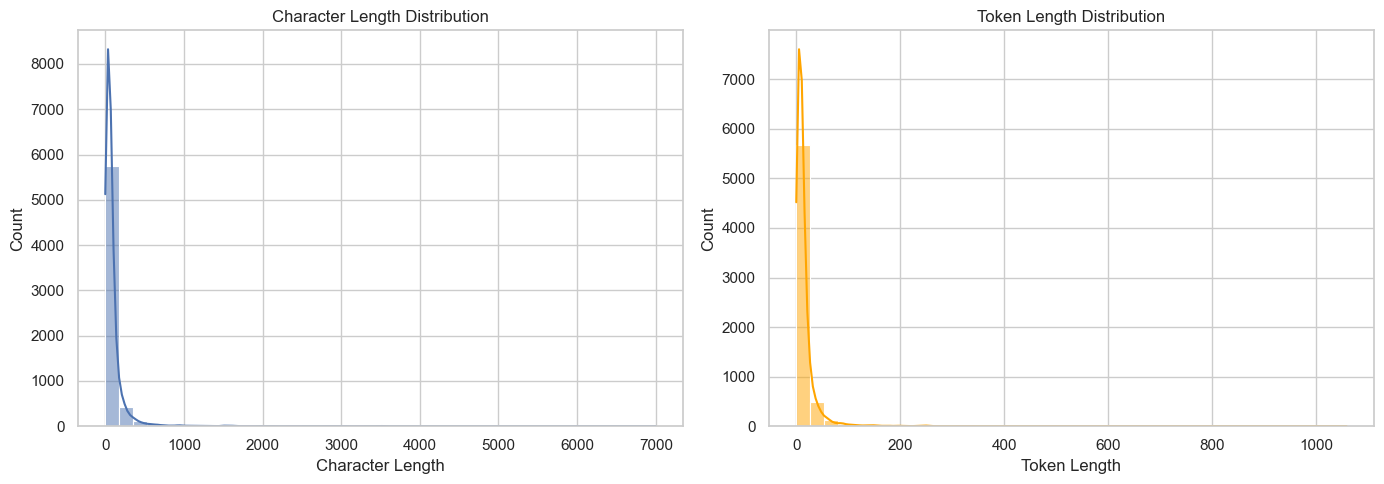

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


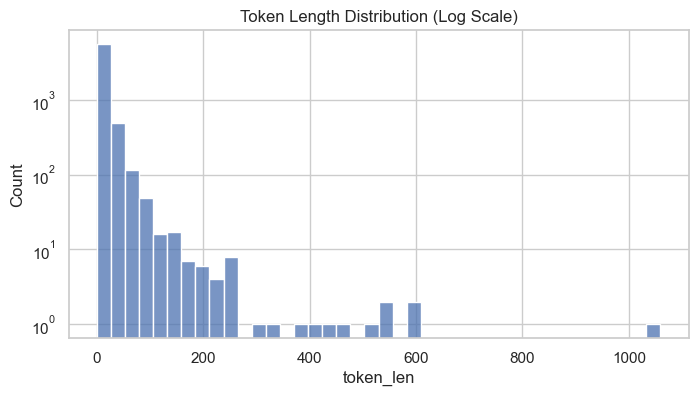

In [131]:
# COMMENT LENGTH DISTRIBUTION
# Helps to understand variation in word count; for example, a sentence like "cool and great"
# contains multiple words with possibly different weight or tone even if both are positive

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['char_len'], bins=40, kde=True, ax=axes[0])
axes[0].set_title('Character Length Distribution')
axes[0].set_xlabel('Character Length')

sns.histplot(df['token_len'], bins=40, kde=True, ax=axes[1], color='orange')
axes[1].set_title('Token Length Distribution')
axes[1].set_xlabel('Token Length')

plt.tight_layout()
plt.show()

# Log-scale (for long tail visualization)
plt.figure(figsize=(8, 4))
sns.histplot(df['token_len'], bins=40)
plt.yscale('log')
plt.title('Token Length Distribution (Log Scale)')
plt.show()

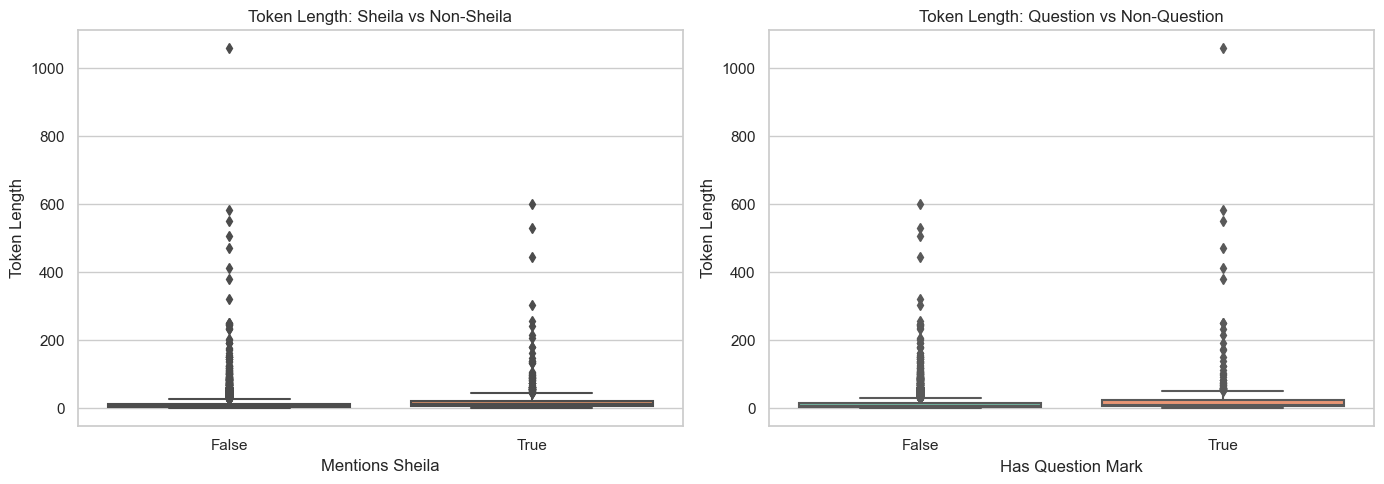

In [132]:
# HISTOGRAM COMPARISON: Sheila vs Non-Sheila, Question vs Non
# Helps identify "outliers" in comment patterns.
# If Sheila-related comments tend to be longer or more expressive,
# this might indicate stronger engagement.

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(x=df['has_sheila'], y=df['token_len'], ax=axes[0])
axes[0].set_xlabel('Mentions Sheila')
axes[0].set_ylabel('Token Length')
axes[0].set_title('Token Length: Sheila vs Non-Sheila')

sns.boxplot(x=df['has_question'], y=df['token_len'], ax=axes[1], palette='Set2')
axes[1].set_xlabel('Has Question Mark')
axes[1].set_ylabel('Token Length')
axes[1].set_title('Token Length: Question vs Non-Question')

plt.tight_layout()
plt.show()

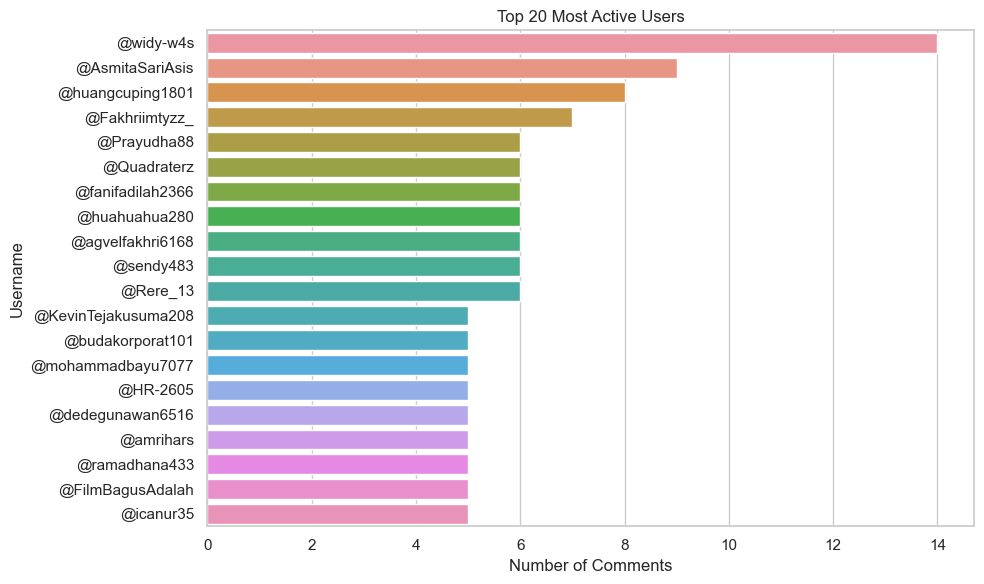

username
@widy-w4s              14
@AsmitaSariAsis         9
@huangcuping1801        8
@Fakhriimtyzz_          7
@Prayudha88             6
@Quadraterz             6
@fanifadilah2366        6
@huahuahua280           6
@agvelfakhri6168        6
@sendy483               6
@Rere_13                6
@KevinTejakusuma208     5
@budakorporat101        5
@mohammadbayu7077       5
@HR-2605                5
@dedegunawan6516        5
@amrihars               5
@ramadhana433           5
@FilmBagusAdalah        5
@icanur35               5
Name: count, dtype: int64

In [133]:
# Top 20 Most Active Users
# To check if a few users dominate the conversation (bias) or if it's more evenly spread (organic)

top_users = df['username'].value_counts().head(20)

plt.figure(figsize=(10,6))
sns.barplot(y=top_users.index, x=top_users.values)
plt.title('Top 20 Most Active Users')
plt.xlabel('Number of Comments')
plt.ylabel('Username')
plt.tight_layout()
plt.show()

top_users

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


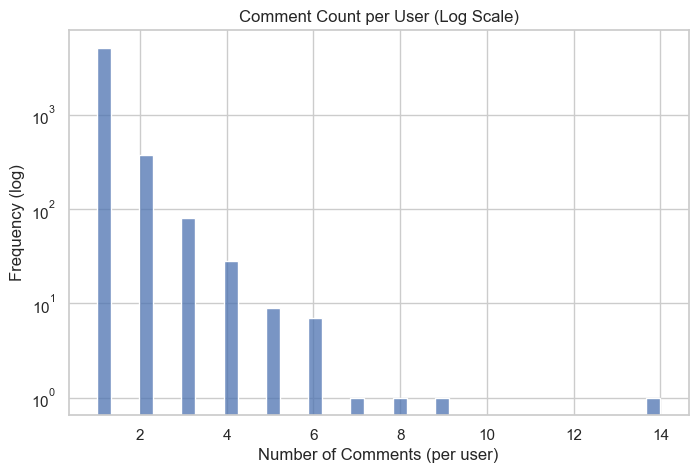

count    5668.000000
mean        1.128088
std         0.513280
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        14.000000
Name: count, dtype: float64

In [134]:
# Comment Distribution per User
# Helps identify users with few vs. many comments
# to ensure a normal participation curve and avoid skew

user_counts = df['username'].value_counts()

plt.figure(figsize=(8, 5))
sns.histplot(user_counts, bins=40, kde=False)
plt.yscale('log')
plt.title('Comment Count per User (Log Scale)')
plt.xlabel('Number of Comments (per user)')
plt.ylabel('Frequency (log)')
plt.show()

user_counts.describe()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24488\2241750579.py:30: UserWarning: Glyph 129401 (\N{FACE HOLDING BACK TEARS}) missing from current font.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24488\2241750579.py:30: UserWarning: Glyph 129782 (\N{HEART HANDS}) missing from current font.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24488\2241750579.py:30: UserWarning: Glyph 129781 (\N{INDEX POINTING AT THE VIEWER}) missing from current font.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24488\2241750579.py:30: UserWarning: Glyph 129776 (\N{HAND WITH INDEX FINGER AND THUMB CROSSED}) missing from current font.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24488\2241750579.py:30: UserWarning: Glyph 10023 (\N{WHITE FOUR POINTED STAR}) missing from current font.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24488\2241750579.py:30: UserWarning: Glyph 129760 (\N{MELTING FACE}) missing from

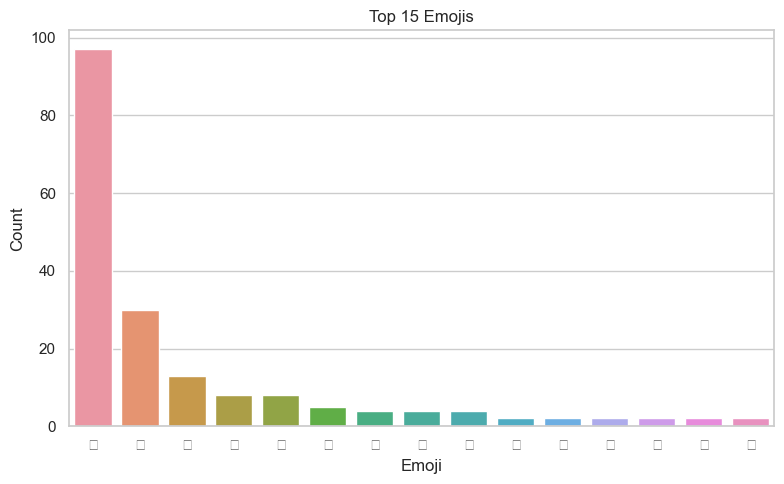

,emoji,count
0,🥹,97
1,🫶,30
2,🫵,13
3,🫰,8
4,✧,8
5,🫠,5
6,🫡,4
7,❝,4
8,❞,4
9,🫣,2


In [135]:
# Emoji Proportion already summarized; now display Top Emojis
# Extract emojis from comment_clean

from collections import Counter

emoji_pattern = re.compile(
    r'['
    r'\U0001F300-\U0001F6FF'
    r'\U0001F900-\U0001F9FF'
    r'\U0001F1E0-\U0001F1FF'
    r'\U00002700-\U000027BF'
    r'\U00002600-\U000026FF'
    r'\U0001FA70-\U0001FAFF'
    r']'
)

all_emoji = []
for txt in df['comment_clean']:
    all_emoji.extend(emoji_pattern.findall(txt))

emoji_counter = Counter(all_emoji)
top_emoji = emoji_counter.most_common(15)
top_emoji_df = pd.DataFrame(top_emoji, columns=['emoji','count'])

plt.figure(figsize=(8,5))
sns.barplot(data=top_emoji_df, x='emoji', y='count')
plt.title('Top 15 Emojis')
plt.xlabel('Emoji')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

top_emoji_df

In [136]:
df

,username,comment,username_raw,comment_raw,comment_clean,comment_plain,char_len,token_len,has_question,emoji_count,has_sheila,suspect_user
0,@najmamld,Om ded kaya seneng bangga bgttt lihat mereka b...,@najmamld,Om ded kaya seneng bangga bgttt lihat mereka b...,om ded kaya seneng bangga bgttt lihat mereka b...,om ded kaya seneng bangga bgttt lihat mereka b...,212,35,False,0,True,False
1,@rezadimas3520,"Gila sabtu ini gue bahagia banget,sheila dtg k...",@rezadimas3520,"Gila sabtu ini gue bahagia banget,sheila dtg k...","gila sabtu ini gue bahagia banget,sheila dtg k...",gila sabtu ini gue bahagia banget sheila dtg k...,104,19,False,0,True,False
2,@Bahantoto_Official,Salut sama keterbukaan dan kejujuran Vidi & Sh...,@Bahantoto_Official,Salut sama keterbukaan dan kejujuran Vidi & Sh...,salut sama keterbukaan dan kejujuran vidi & sh...,salut sama keterbukaan dan kejujuran vidi shei...,215,31,False,0,True,False
3,@linarain8402,"Ya Allah, beri vidi kesehatan & panjang umur, ...",@linarain8402,"Ya Allah, beri vidi kesehatan & panjang umur, ...","ya allah, beri vidi kesehatan & panjang umur, ...",ya allah beri vidi kesehatan panjang umur krn ...,86,13,False,0,False,False
4,@DWV99-Khusus-Sultan,"Dari awal cuma mau nonton iseng, eh malah dape...",@DWV99-Khusus-Sultan,"Dari awal cuma mau nonton iseng, eh malah dape...","dari awal cuma mau nonton iseng, eh malah dape...",dari awal cuma mau nonton iseng eh malah dapet...,133,23,False,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
10216,@danangari867,Ngak ada yg sempurna paling ngak 9 untuk pasan...,@danangari867,Ngak ada yg sempurna paling ngak 9 untuk pasan...,ngak ada yg sempurna paling ngak 9 untuk pasan...,ngak ada yg sempurna paling ngak 9 untuk pasan...,67,12,False,0,False,False
10722,@yohanajuniar2902,ternyata sama sama libra pantes ni 1 2 ngeseli...,@yohanajuniar2902,ternyata sama sama libra pantes ni 1 2 ngeseli...,ternyata sama sama libra pantes ni 1 2 ngeseli...,ternyata sama sama libra pantes ni 1 2 ngeseli...,50,9,False,0,False,False
11375,@Jerden25,Sore IDAMAN (Sore Istri DAri MAsa depaN) BOOM...,@Jerden25,Sore IDAMAN (Sore Istri DAri MAsa depaN) BOOM...,sore idaman (sore istri dari masa depan) boom!...,sore idaman sore istri dari masa depan boom be...,96,15,False,0,False,False
11376,@GooglenyaMasBintang,KEREN!,@GooglenyaMasBintang,KEREN!,keren!,keren,6,1,False,0,False,False


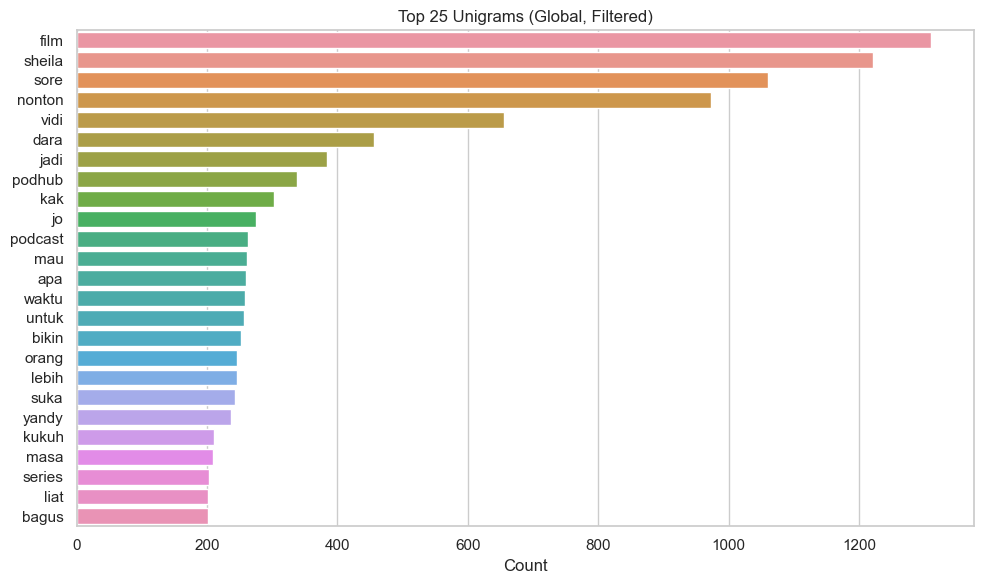

,term,count
0,film,1311
1,sheila,1221
2,sore,1061
3,nonton,973
4,vidi,655
5,dara,456
6,jadi,384
7,podhub,338
8,kak,303
9,jo,275


In [137]:
# Unigram (Most Frequent Words)

from collections import Counter

# Get tokens from comment_plain
tokens_global = []
for txt in df['comment_plain']:
    tokens_global.extend(txt.split())

# Simple stopwords list (can be expanded)
# stopwords = {
#     'dan','yang','di','ke','dengan','atau','ini','itu','ya','kok','aja','si','karena','buat',
#     'banget','bgt','udah','lagi','the','to','of','a','in','itu','nya','ga','gak','nggak','yg',
#     'saya','aku','ada','dari','bisa','sama','dia', 'yang', 'bang', 'kali', 'akhirnya', 'dari',
#     'tapi', 'sih', 'kalo', 'juga'
# }
stopwords = {
    'dan','yang','di','ke','dengan','atau','ini','itu','ya','kok','aja','si','karena','buat',
    'banget','bgt','udah','lagi','the','to','of','a','in','itu','nya','ga','gak','nggak','yg',
    'saya','aku','ada','dari','bisa','sama','dia','bang','kali','akhirnya','tapi','sih',
    'kalo','juga','nih','pas','pada','kaya','kayak','loh','eh',
    'gue','gw','kamu','lu','mereka','kita','parah','amat','serius','gila',
    'ka','om','bro','sis','pertama','kedua','baru','sekarang','tadi','besok',
    'banget banget','keren banget',  
}

tokens_filtered = [t for t in tokens_global if t and t not in stopwords and len(t) > 1]
count_uni = Counter(tokens_filtered).most_common(25)
unigram_df = pd.DataFrame(count_uni, columns=['term', 'count'])

plt.figure(figsize=(10,6))
sns.barplot(data=unigram_df, y='term', x='count')
plt.title('Top 25 Unigrams (Global, Filtered)')
plt.xlabel('Count')
plt.ylabel('')
plt.tight_layout()
plt.show()

unigram_df.head(10)

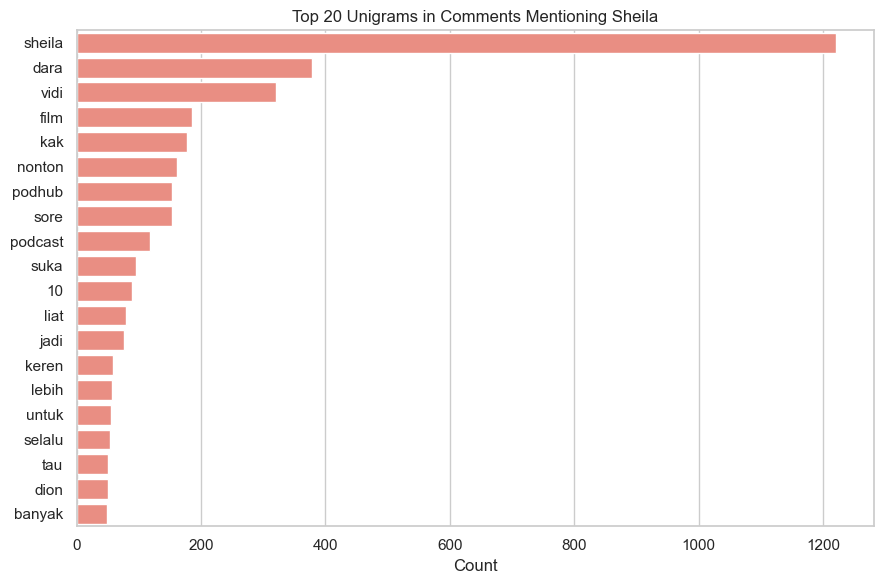

,term,count
0,sheila,1221
1,dara,378
2,vidi,320
3,film,185
4,kak,178
5,nonton,161
6,podhub,154
7,sore,154
8,podcast,118
9,suka,95


In [138]:
# Unigrams in Sheila-Mentioning Comments

sheila_tokens = []
subset_sheila = df[df['has_sheila']]
for txt in subset_sheila['comment_plain']:
    sheila_tokens.extend(txt.split())

sheila_tokens_f = [t for t in sheila_tokens if t not in stopwords and len(t) > 1]
count_sheila_uni = Counter(sheila_tokens_f).most_common(20)
sheila_uni_df = pd.DataFrame(count_sheila_uni, columns=['term','count'])

plt.figure(figsize=(9,6))
sns.barplot(data=sheila_uni_df, y='term', x='count', color='salmon')
plt.title('Top 20 Unigrams in Comments Mentioning Sheila')
plt.xlabel('Count')
plt.ylabel('')
plt.tight_layout()
plt.show()

sheila_uni_df.head(10)

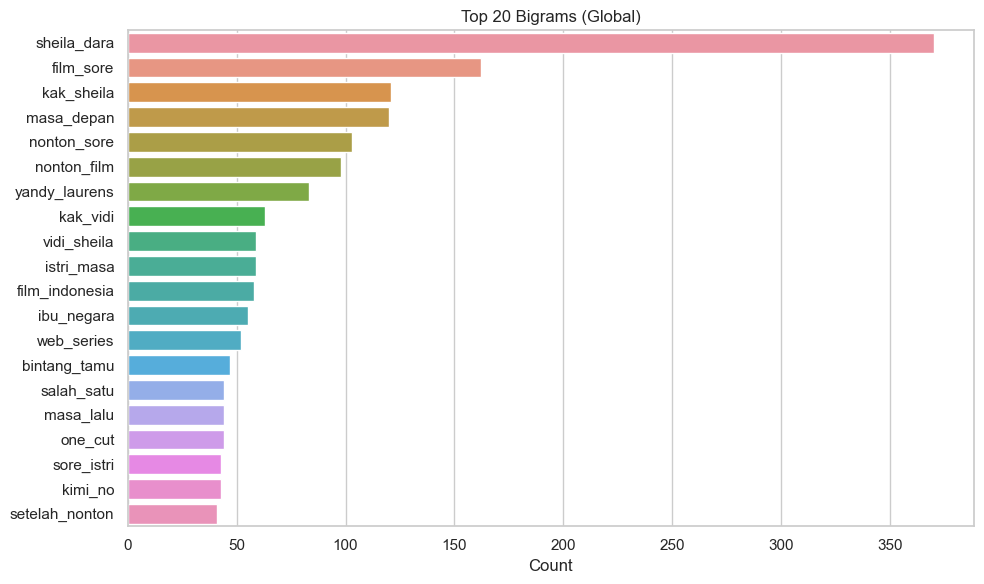

,bigram,count
0,sheila_dara,370
1,film_sore,162
2,kak_sheila,121
3,masa_depan,120
4,nonton_sore,103


In [139]:
# Bigrams (2-word phrases)

from itertools import tee

def bigrams(tokens):
    a, b = tee(tokens)
    next(b, None)
    for x, y in zip(a, b):
        yield f"{x}_{y}"

bigrams_global = []
for txt in df['comment_plain']:
    toks = [t for t in txt.split() if t not in stopwords and len(t) > 1]
    bigrams_global.extend(list(bigrams(toks)))

bigram_counts = Counter(bigrams_global).most_common(20)
bigram_df = pd.DataFrame(bigram_counts, columns=['bigram', 'count'])

plt.figure(figsize=(10,6))
sns.barplot(data=bigram_df, y='bigram', x='count')
plt.title('Top 20 Bigrams (Global)')
plt.xlabel('Count')
plt.ylabel('')
plt.tight_layout()
plt.show()

bigram_df.head()

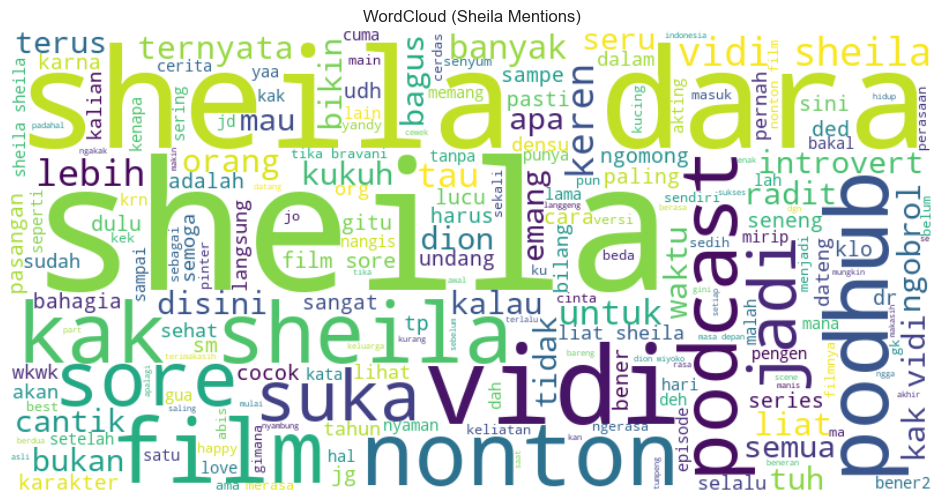

In [140]:
# WordCloud: Sheila-related tokens
text_wc = ' '.join(sheila_tokens_f)
wc = WordCloud(width=800, height=400, background_color='white').generate(text_wc)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud (Sheila Mentions)')
plt.show()

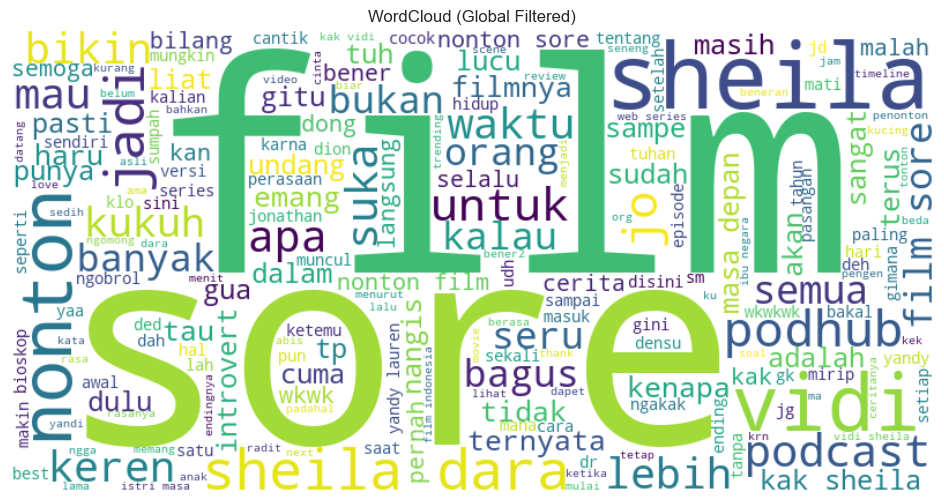

In [141]:
# WordCloud: All tokens (filtered)
text_wc = ' '.join(tokens_filtered)
wc = WordCloud(width=800, height=400, background_color='white').generate(text_wc)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud (Global Filtered)')
plt.show()

In [142]:
# num_cols = ['char_len','token_len','emoji_count']
# if 'likes' in df.columns: num_cols.append('likes')
# if 'replies' in df.columns: num_cols.append('replies')

# corr = df[num_cols].corr()

# plt.figure(figsize=(6,5))
# sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
# plt.title('Korelasi Fitur Numerik')
# plt.show()
# corr


In [143]:
# plt.figure(figsize=(8,5))
# sns.scatterplot(data=df.sample(min(2000, len(df))), x='token_len', y='emoji_count',
#                 hue='has_sheila', alpha=0.6)
# plt.title('Token Length vs Emoji Count (sample)')
# plt.xlabel('Token Length')
# plt.ylabel('Emoji Count')
# plt.tight_layout()
# plt.show()


In [144]:
summary_auto = {}

summary_auto['total_comments'] = len(df)
summary_auto['unique_users'] = df['username'].nunique()
summary_auto['median_tokens'] = int(df['token_len'].median())
summary_auto['pct_question'] = round(100 * df['has_question'].mean(), 2)
summary_auto['pct_has_emoji'] = round(100 * (df['emoji_count']>0).mean(), 2)
summary_auto['sheila_share_pct'] = round(100 * df['has_sheila'].mean(), 2)
summary_auto['top_user'] = df['username'].value_counts().index[0]
summary_auto['top_user_comments'] = int(df['username'].value_counts().iloc[0])
summary_auto

# Tampilkan 5 kata paling sering (global & sheila)
summary_auto['top5_unigram_global'] = unigram_df.head(5)['term'].tolist()
summary_auto['top5_unigram_sheila'] = sheila_uni_df.head(5)['term'].tolist() if len(df[df['has_sheila']])>0 else []
summary_auto


{'total_comments': 6394,
 'unique_users': 5668,
 'median_tokens': 8,
 'pct_question': 6.46,
 'pct_has_emoji': 1.74,
 'sheila_share_pct': 16.33,
 'top_user': '@widy-w4s',
 'top_user_comments': 14,
 'top5_unigram_global': ['film', 'sheila', 'sore', 'nonton', 'vidi'],
 'top5_unigram_sheila': ['sheila', 'dara', 'vidi', 'film', 'kak']}

# **Base Line Sentiment Rule-Based**

In [145]:
# Dictionary definition and parameter

In [146]:
# --- 1.1 Positive / Negative word lexicons (extend as needed) ---
lex_pos = {
    'bagus', 'keren', 'kerenbanget', 'suka', 'mantap', 'natural', 'gemes', 'lucu', 'haru',
    'mengena', 'rapi', 'smooth', 'strong', 'greget', 'niat', 'cantik', 'chemistry', 'top',
    'mantul', 'juara', 'stabil', 'kerennya', 'bagusnya', 'recommend', 'recommended',
    'powerful', 'wah', 'wow', 'apik', 'solid', 'kocak', 'ngena', 'bahagia', 'seneng',
    'inspiratif', 'salut', 'sehat', 'sukses', 'sayang', 'kerenabis', 'terbaik',
    'bangga', 'ceria', 'adem', 'sembuh', 'setia','terharu','happy'
}

lex_neg = {
    'jelek', 'garing', 'lebay', 'aneh', 'nanggung', 'lambat', 'bosan', 'bosen', 'buruk',
    'kaku', 'maksa', 'berantakan', 'cringe', 'payah', 'parah', 'kampungan', 'anehnya',
    'melelahkan', 'membosankan', 'kurang', 'letoy', 'cupu', 'gaje', 'gagal',
    'sakit', 'kasihan', 'kecewa', 'masalah', 'takut', 'sedih'
}

# --- 1.2 Bigram (two-word phrase) sentiment lexicons ---
bigram_pos = {
    'akting natural', 'chemistry kuat', 'cerita kuat', 'alur rapi', 'ending bagus',
    'chemistry dapet', 'akting bagus', 'akting keren', 'semoga lekas',
    'lekas sembuh', 'panjang umur', 'sehat selalu', 'terima kasih', 'ikut seneng',
    'bahagia selalu'
}


bigram_neg = {
    'ending nanggung', 'alur lambat', 'plot bolong', 'chemistry kurang',
    'akting kaku', 'tempo lambat', 'alur berantakan', 'cerita lemah', 'akting jelek',
    'gak mau', 'gak bisa', 'jangan jangan'
}

# --- 1.3 Emoji sets (extend as needed) ---
emoji_pos = set(list("❤️💖💕😍😊😀😁🤩😂🙌👍🔥💯🤗😄😆☺️✨🎉👏"))
emoji_neg = set(list("😒😡😠😔😢😭👎🙄😑🤨☹️😞😩😤"))

# --- 1.4 Negation & intensifier tokens ---
negations = {'tidak','gak','ga','tak','tdk','bukan','kurang'}
intensifiers = {'banget','bgt','amat','sangat','parah','beneran'}

# --- 1.5 Weights (tune later if needed) ---
W_POS_WORD      = 1.0
W_NEG_WORD      = -1.0
W_POS_BIGRAM    = 2.0
W_NEG_BIGRAM    = -2.0
W_POS_EMOJI     = 1.0
W_NEG_EMOJI     = -1.0
W_INTENSIFIER   = 0.5      # extra boost if intensifier follows a positive word
W_NEGATION_FLIP = True     # flip polarity of the next sentiment word after negation

In [147]:
# Ensure df exists (cleaned dataset). Assumes 'comment_plain' & 'comment_clean' columns exist.

# Tokenize comment_plain (already alphanumeric & lowercased)
tokens_list = []
for txt in df['comment_plain']:
    tokens = txt.split()
    tokens_list.append(tokens)
df['tokens'] = tokens_list

# Build bigrams as space-joined strings
bigrams_list = []
for tokens in df['tokens']:
    bgs = []
    for i in range(len(tokens)-1):
        bgs.append(tokens[i] + ' ' + tokens[i+1])
    bigrams_list.append(bgs)
df['bigrams'] = bigrams_list

# Initialize sentiment score column
df['sentiment_score'] = 0.0

In [148]:
scores = []

for idx, row in df.iterrows():
    tokens = row['tokens']
    bgs    = row['bigrams']
    raw_comment = row['comment_clean']  # retains emojis
    score = 0.0

    # 1) Bigram matching first (phrases carry stronger semantic weight)
    for bg in bgs:
        if bg in bigram_pos:
            score += W_POS_BIGRAM
        if bg in bigram_neg:
            score += W_NEG_BIGRAM

    # 2) Word-level scan with negation + intensifier handling
    #    Negation scope: affects the *next* sentiment-bearing token
    skip_negate_once = False
    prev_was_pos = False  # track if previous token was positive (for intensifier)
    for i, w in enumerate(tokens):
        # Intensifier: if current token is an intensifier & previous was positive, add boost
        if w in intensifiers and prev_was_pos:
            score += W_INTENSIFIER
            continue

        # Negation marker: set flag to flip polarity of the next sentiment word
        if w in negations:
            skip_negate_once = True
            prev_was_pos = False
            continue

        base = 0.0
        if w in lex_pos:
            base = W_POS_WORD
            prev_was_pos = True
        elif w in lex_neg:
            base = W_NEG_WORD
            prev_was_pos = False
        else:
            prev_was_pos = False

        # Apply negation flip logic
        if base != 0 and skip_negate_once and W_NEGATION_FLIP:
            base = -base
            skip_negate_once = False
        elif base != 0 and skip_negate_once and not W_NEGATION_FLIP:
            # If not flipping, just consume the negation scope
            skip_negate_once = False

        score += base

    # 3) Emoji-based scoring (unique emojis counted; adjust if you prefer total occurrences)
    pos_e = set()
    neg_e = set()
    for ch in raw_comment:
        if ch in emoji_pos:
            pos_e.add(ch)
        elif ch in emoji_neg:
            neg_e.add(ch)
    score += len(pos_e) * W_POS_EMOJI
    score += len(neg_e) * W_NEG_EMOJI

    scores.append(score)

df['sentiment_score'] = scores

In [149]:
df.head(20)

,username,comment,username_raw,comment_raw,comment_clean,comment_plain,char_len,token_len,has_question,emoji_count,has_sheila,suspect_user,tokens,bigrams,sentiment_score
0,@najmamld,Om ded kaya seneng bangga bgttt lihat mereka b...,@najmamld,Om ded kaya seneng bangga bgttt lihat mereka b...,om ded kaya seneng bangga bgttt lihat mereka b...,om ded kaya seneng bangga bgttt lihat mereka b...,212,35,False,0,True,False,"[om, ded, kaya, seneng, bangga, bgttt, lihat, ...","[om ded, ded kaya, kaya seneng, seneng bangga,...",8.0
1,@rezadimas3520,"Gila sabtu ini gue bahagia banget,sheila dtg k...",@rezadimas3520,"Gila sabtu ini gue bahagia banget,sheila dtg k...","gila sabtu ini gue bahagia banget,sheila dtg k...",gila sabtu ini gue bahagia banget sheila dtg k...,104,19,False,0,True,False,"[gila, sabtu, ini, gue, bahagia, banget, sheil...","[gila sabtu, sabtu ini, ini gue, gue bahagia, ...",3.0
2,@Bahantoto_Official,Salut sama keterbukaan dan kejujuran Vidi & Sh...,@Bahantoto_Official,Salut sama keterbukaan dan kejujuran Vidi & Sh...,salut sama keterbukaan dan kejujuran vidi & sh...,salut sama keterbukaan dan kejujuran vidi shei...,215,31,False,0,True,False,"[salut, sama, keterbukaan, dan, kejujuran, vid...","[salut sama, sama keterbukaan, keterbukaan dan...",5.0
3,@linarain8402,"Ya Allah, beri vidi kesehatan & panjang umur, ...",@linarain8402,"Ya Allah, beri vidi kesehatan & panjang umur, ...","ya allah, beri vidi kesehatan & panjang umur, ...",ya allah beri vidi kesehatan panjang umur krn ...,86,13,False,0,False,False,"[ya, allah, beri, vidi, kesehatan, panjang, um...","[ya allah, allah beri, beri vidi, vidi kesehat...",2.0
4,@DWV99-Khusus-Sultan,"Dari awal cuma mau nonton iseng, eh malah dape...",@DWV99-Khusus-Sultan,"Dari awal cuma mau nonton iseng, eh malah dape...","dari awal cuma mau nonton iseng, eh malah dape...",dari awal cuma mau nonton iseng eh malah dapet...,133,23,False,0,True,False,"[dari, awal, cuma, mau, nonton, iseng, eh, mal...","[dari awal, awal cuma, cuma mau, mau nonton, n...",1.0
5,@Visi4d_MudahMaxwin,Baru Mulai aja udah pecahh Makin betah sama k...,@Visi4d_MudahMaxwin,Baru Mulai aja udah pecahh Makin betah sama k...,baru mulai aja udah pecahh makin betah sama ko...,baru mulai aja udah pecahh makin betah sama ko...,54,10,False,0,False,False,"[baru, mulai, aja, udah, pecahh, makin, betah,...","[baru mulai, mulai aja, aja udah, udah pecahh,...",0.0
6,@ekahdr,WAIT?AKHIRNYAAAAA,@ekahdr,WAIT?AKHIRNYAAAAA,wait?akhirnyaaaaa,wait akhirnyaaaaa,17,2,True,0,False,False,"[wait, akhirnyaaaaa]",[wait akhirnyaaaaa],0.0
7,@cchasagala,Terharu banget waktu denger sheila ngomong kur...,@cchasagala,Terharu banget waktu denger sheila ngomong kur...,terharu banget waktu denger sheila ngomong kur...,terharu banget waktu denger sheila ngomong kur...,262,42,False,1,True,False,"[terharu, banget, waktu, denger, sheila, ngomo...","[terharu banget, banget waktu, waktu denger, d...",2.5
8,@JuaraDiVisi4D,Gila sih Sheila emang bener2 paling tau bange...,@JuaraDiVisi4D,Gila sih Sheila emang bener2 paling tau bange...,gila sih sheila emang bener2 paling tau banget...,gila sih sheila emang bener2 paling tau banget...,105,20,False,0,True,False,"[gila, sih, sheila, emang, bener2, paling, tau...","[gila sih, sih sheila, sheila emang, emang ben...",1.0
9,@windyislamsari1811,"sesuai ekspektasi banget, liat sheila berkelia...",@windyislamsari1811,"sesuai ekspektasi banget, liat sheila berkelia...","sesuai ekspektasi banget, liat sheila berkelia...",sesuai ekspektasi banget liat sheila berkeliar...,120,19,False,0,True,False,"[sesuai, ekspektasi, banget, liat, sheila, ber...","[sesuai ekspektasi, ekspektasi banget, banget ...",0.0


In [150]:
# df['tokens'].to_csv('tokens.csv', index=False)

In [151]:
# Map Score to Discrete Label
def map_label(s):
    if s > 0:
        return 'pos'
    elif s < 0:
        return 'neg'
    else:
        return 'neu'

df['sentiment_label'] = df['sentiment_score'].apply(map_label)

df[['comment_raw','sentiment_score','sentiment_label','has_sheila']].head(30)

,comment_raw,sentiment_score,sentiment_label,has_sheila
0,Om ded kaya seneng bangga bgttt lihat mereka b...,8.0,pos,True
1,"Gila sabtu ini gue bahagia banget,sheila dtg k...",3.0,pos,True
2,Salut sama keterbukaan dan kejujuran Vidi & Sh...,5.0,pos,True
3,"Ya Allah, beri vidi kesehatan & panjang umur, ...",2.0,pos,False
4,"Dari awal cuma mau nonton iseng, eh malah dape...",1.0,pos,True
5,Baru Mulai aja udah pecahh Makin betah sama k...,0.0,neu,False
6,WAIT?AKHIRNYAAAAA,0.0,neu,False
7,Terharu banget waktu denger sheila ngomong kur...,2.5,pos,True
8,Gila sih Sheila emang bener2 paling tau bange...,1.0,pos,True
9,"sesuai ekspektasi banget, liat sheila berkelia...",0.0,neu,True


In [152]:
# Global & Sheila Subset Distributions

dist_global = df['sentiment_label'].value_counts(normalize=True).reindex(['pos','neg','neu']).fillna(0)*100
dist_sheila = df[df['has_sheila']]['sentiment_label'].value_counts(normalize=True).reindex(['pos','neg','neu']).fillna(0)*100

print("Global Distribution (%)\n", dist_global.round(2))
print("\nSheila Mention Distribution (%)\n", dist_sheila.round(2))

positive_lift = dist_sheila['pos'] - dist_global['pos']
negative_lift = dist_sheila['neg'] - dist_global['neg']

print(f"\nPositive Lift (Sheila vs Global): {positive_lift:.2f} percentage points")
print(f"Negative Lift (Sheila vs Global): {negative_lift:.2f} percentage points")

Global Distribution (%)
 sentiment_label
pos    19.71
neg     3.78
neu    76.51
Name: proportion, dtype: float64

Sheila Mention Distribution (%)
 sentiment_label
pos    30.46
neg     4.31
neu    65.23
Name: proportion, dtype: float64

Positive Lift (Sheila vs Global): 10.75 percentage points
Negative Lift (Sheila vs Global): 0.53 percentage points


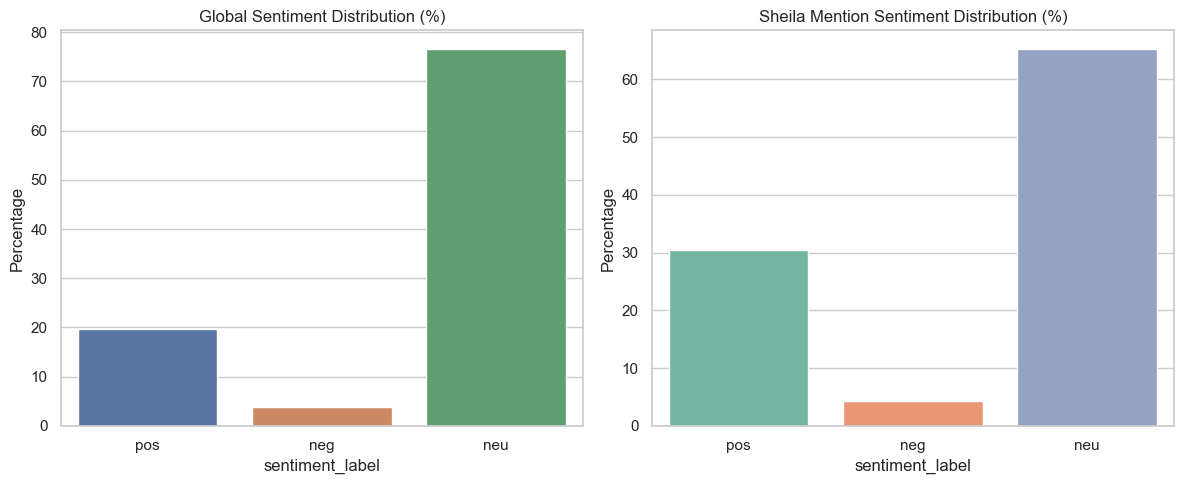

In [153]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.barplot(x=dist_global.index, y=dist_global.values, ax=axes[0])
axes[0].set_title('Global Sentiment Distribution (%)')
axes[0].set_ylabel('Percentage')

sns.barplot(x=dist_sheila.index, y=dist_sheila.values, ax=axes[1], palette='Set2')
axes[1].set_title('Sheila Mention Sentiment Distribution (%)')
axes[1].set_ylabel('Percentage')

plt.tight_layout()
plt.show()


In [154]:
# Share (%) of comments mentioning Sheila
sheila_share_pct = df['has_sheila'].mean() * 100

# Emoji density (mean emojis per comment)
emoji_global = df['emoji_count'].mean()
emoji_sheila = df[df['has_sheila']]['emoji_count'].mean()
emoji_lift = (emoji_sheila - emoji_global)

# Clamp helper to avoid negative contribution for lifts
def clamp_zero(x):
    return max(0, x)

impact_raw = (
    0.4 * sheila_share_pct +
    0.4 * clamp_zero(positive_lift) +
    0.2 * clamp_zero(emoji_lift * 10)  # scale emoji lift for balance
)

sheila_impact_v0 = round(impact_raw, 2)

impact_components = {
    'sheila_share_pct' : round(sheila_share_pct,2),
    'positive_lift_pp' : round(positive_lift,2),
    'emoji_lift_raw'   : round(emoji_lift,3),
    'computed_impact_v0': sheila_impact_v0
}

impact_in_percent = {}

for key, value in impact_components.items():
    if key == 'emoji_lift_raw':
        impact_in_percent[key] = f"{value * 100:.1f}%"
    else:
        impact_in_percent[key] = f"{value:.2f}%"

# Cetak hasilnya
print(impact_components)
print(impact_in_percent)



{'sheila_share_pct': 16.33, 'positive_lift_pp': 10.75, 'emoji_lift_raw': 0.012, 'computed_impact_v0': 10.86}
{'sheila_share_pct': '16.33%', 'positive_lift_pp': '10.75%', 'emoji_lift_raw': '1.2%', 'computed_impact_v0': '10.86%'}


c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


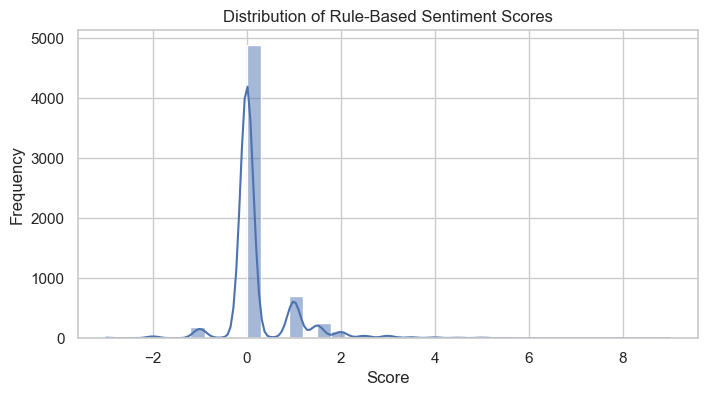

count    6394.000000
mean        0.252737
std         0.800543
min        -3.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: sentiment_score, dtype: float64

In [155]:
plt.figure(figsize=(8,4))
sns.histplot(df['sentiment_score'], bins=40, kde=True)
plt.title('Distribution of Rule-Based Sentiment Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

df['sentiment_score'].describe()


Top Positive Terms:


,term,count
15,suka,243
20,bagus,202
14,keren,195
12,lucu,130
9,sehat,113
18,cantik,105
2,bahagia,71
16,terbaik,68
0,seneng,58
30,wah,47


Top Negative Terms:


,term,count
2,kurang,61
3,sedih,58
1,sakit,44
0,parah,43
8,takut,27
9,aneh,23
6,gagal,21
7,bosen,15
16,masalah,11
15,jelek,9


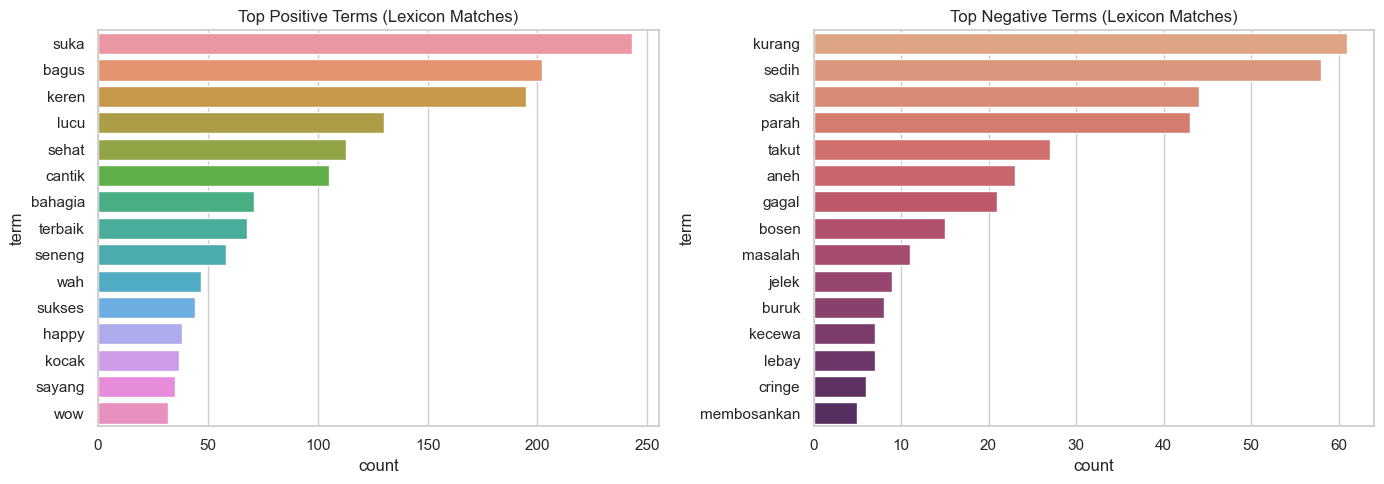

In [156]:
pos_hits = {}
neg_hits = {}

for tokens in df['tokens']:
    for t in tokens:
        if t in lex_pos:
            pos_hits[t] = pos_hits.get(t,0)+1
        if t in lex_neg:
            neg_hits[t] = neg_hits.get(t,0)+1

pos_df = (pd.DataFrame(pos_hits.items(), columns=['term','count'])
          .sort_values('count', ascending=False).head(15))
neg_df = (pd.DataFrame(neg_hits.items(), columns=['term','count'])
          .sort_values('count', ascending=False).head(15))

print("Top Positive Terms:")
display(pos_df)
print("Top Negative Terms:")
display(neg_df)

fig, axes = plt.subplots(1,2, figsize=(14,5))
sns.barplot(data=pos_df, y='term', x='count', ax=axes[0])
axes[0].set_title('Top Positive Terms (Lexicon Matches)')
sns.barplot(data=neg_df, y='term', x='count', ax=axes[1], palette='flare')
axes[1].set_title('Top Negative Terms (Lexicon Matches)')
plt.tight_layout()
plt.show()


In [157]:
# Sample a subset for manual labeling - fill in 'manual_label' later with pos/neg/neu
sample_validate = df.sample(min(50, len(df)))[['comment_raw','sentiment_label','sentiment_score']]
# sample_validate['manual_label'] = ''   # fill manually outside if desired/
sample_validate.reset_index(drop=True, inplace=True)
sample_validate.head(15)


,comment_raw,sentiment_label,sentiment_score
0,Gua diGaru da-Hoki Gapake pola tetep aja jp juga,neu,0.0
1,Kukuh ke counter abis wkwkwkw,neu,0.0
2,"Kalaupun harus pacaran, harusnya tuh seperti i...",neu,0.0
3,lucu banget,pos,1.5
4,iya iya hari ini gw ntn sore deh,neu,0.0
5,Wow udah 6.6 M,pos,1.0
6,"Sama dong kita, dulu saya juga masuk SD umur 4...",neu,0.0
7,Akhirnyaaaa yg di tunggu² .....,neu,0.0
8,mau nangis ada sheila di youtube radit lagi. M...,neu,0.0
9,Akhirnya lawan sepadan,neu,0.0


In [158]:
df

,username,comment,username_raw,comment_raw,comment_clean,comment_plain,char_len,token_len,has_question,emoji_count,has_sheila,suspect_user,tokens,bigrams,sentiment_score,sentiment_label
0,@najmamld,Om ded kaya seneng bangga bgttt lihat mereka b...,@najmamld,Om ded kaya seneng bangga bgttt lihat mereka b...,om ded kaya seneng bangga bgttt lihat mereka b...,om ded kaya seneng bangga bgttt lihat mereka b...,212,35,False,0,True,False,"[om, ded, kaya, seneng, bangga, bgttt, lihat, ...","[om ded, ded kaya, kaya seneng, seneng bangga,...",8.0,pos
1,@rezadimas3520,"Gila sabtu ini gue bahagia banget,sheila dtg k...",@rezadimas3520,"Gila sabtu ini gue bahagia banget,sheila dtg k...","gila sabtu ini gue bahagia banget,sheila dtg k...",gila sabtu ini gue bahagia banget sheila dtg k...,104,19,False,0,True,False,"[gila, sabtu, ini, gue, bahagia, banget, sheil...","[gila sabtu, sabtu ini, ini gue, gue bahagia, ...",3.0,pos
2,@Bahantoto_Official,Salut sama keterbukaan dan kejujuran Vidi & Sh...,@Bahantoto_Official,Salut sama keterbukaan dan kejujuran Vidi & Sh...,salut sama keterbukaan dan kejujuran vidi & sh...,salut sama keterbukaan dan kejujuran vidi shei...,215,31,False,0,True,False,"[salut, sama, keterbukaan, dan, kejujuran, vid...","[salut sama, sama keterbukaan, keterbukaan dan...",5.0,pos
3,@linarain8402,"Ya Allah, beri vidi kesehatan & panjang umur, ...",@linarain8402,"Ya Allah, beri vidi kesehatan & panjang umur, ...","ya allah, beri vidi kesehatan & panjang umur, ...",ya allah beri vidi kesehatan panjang umur krn ...,86,13,False,0,False,False,"[ya, allah, beri, vidi, kesehatan, panjang, um...","[ya allah, allah beri, beri vidi, vidi kesehat...",2.0,pos
4,@DWV99-Khusus-Sultan,"Dari awal cuma mau nonton iseng, eh malah dape...",@DWV99-Khusus-Sultan,"Dari awal cuma mau nonton iseng, eh malah dape...","dari awal cuma mau nonton iseng, eh malah dape...",dari awal cuma mau nonton iseng eh malah dapet...,133,23,False,0,True,False,"[dari, awal, cuma, mau, nonton, iseng, eh, mal...","[dari awal, awal cuma, cuma mau, mau nonton, n...",1.0,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10216,@danangari867,Ngak ada yg sempurna paling ngak 9 untuk pasan...,@danangari867,Ngak ada yg sempurna paling ngak 9 untuk pasan...,ngak ada yg sempurna paling ngak 9 untuk pasan...,ngak ada yg sempurna paling ngak 9 untuk pasan...,67,12,False,0,False,False,"[ngak, ada, yg, sempurna, paling, ngak, 9, unt...","[ngak ada, ada yg, yg sempurna, sempurna palin...",0.0,neu
10722,@yohanajuniar2902,ternyata sama sama libra pantes ni 1 2 ngeseli...,@yohanajuniar2902,ternyata sama sama libra pantes ni 1 2 ngeseli...,ternyata sama sama libra pantes ni 1 2 ngeseli...,ternyata sama sama libra pantes ni 1 2 ngeseli...,50,9,False,0,False,False,"[ternyata, sama, sama, libra, pantes, ni, 1, 2...","[ternyata sama, sama sama, sama libra, libra p...",0.0,neu
11375,@Jerden25,Sore IDAMAN (Sore Istri DAri MAsa depaN) BOOM...,@Jerden25,Sore IDAMAN (Sore Istri DAri MAsa depaN) BOOM...,sore idaman (sore istri dari masa depan) boom!...,sore idaman sore istri dari masa depan boom be...,96,15,False,0,False,False,"[sore, idaman, sore, istri, dari, masa, depan,...","[sore idaman, idaman sore, sore istri, istri d...",0.0,neu
11376,@GooglenyaMasBintang,KEREN!,@GooglenyaMasBintang,KEREN!,keren!,keren,6,1,False,0,False,False,[keren],[],1.0,pos


In [159]:
# Copy cleaned dataframe; assumes `df` already exists with columns like:
# comment_plain, comment_raw, token_len, has_sheila, suspect_user, sentiment_label, etc.
df_cluster = df.copy()

# Filter out ultra-short comments (optional: they add noise for topic clustering)
min_tokens = 2
df_cluster = df_cluster[df_cluster['token_len'] >= min_tokens].reset_index(drop=True)

# Optionally remove suspected spam/bot users
df_cluster = df_cluster[~df_cluster['suspect_user']].reset_index(drop=True)

print("Total comments after token length filter:", len(df_cluster))
df_cluster[['comment_raw','comment_plain']].head(3)


Total comments after token length filter: 6142


,comment_raw,comment_plain
0,Om ded kaya seneng bangga bgttt lihat mereka b...,om ded kaya seneng bangga bgttt lihat mereka b...
1,"Gila sabtu ini gue bahagia banget,sheila dtg k...",gila sabtu ini gue bahagia banget sheila dtg k...
2,Salut sama keterbukaan dan kejujuran Vidi & Sh...,salut sama keterbukaan dan kejujuran vidi shei...


In [160]:
vectorizer = TfidfVectorizer(
    ngram_range=(1,2),
    min_df=5,          # ignore terms seen in fewer than 5 comments
    max_df=0.5,        # ignore terms present in >50% of comments (too generic)
    max_features=20000,
    sublinear_tf=True  # dampen very high term frequencies
)

tfidf_matrix = vectorizer.fit_transform(df_cluster['comment_plain'])
print("TF-IDF shape:", tfidf_matrix.shape)

TF-IDF shape: (6142, 3754)


In [161]:


possible_k = [5,7,8,9,10,12,15]
inertias = []
sil_scores = []

# NOTE: silhouette on high-dimensional sparse text often low; use comparatively.
for k in possible_k:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(tfidf_matrix)
    inertias.append(km.inertia_)
    
    if tfidf_matrix.shape[0] > 5000:
        # sample to speed up; silhouette is O(n^2) distance operations internally
        sample_idx = np.random.choice(tfidf_matrix.shape[0], 5000, replace=False)
        sil = silhouette_score(tfidf_matrix[sample_idx], km.labels_[sample_idx])
    else:
        sil = silhouette_score(tfidf_matrix, km.labels_)
    sil_scores.append(sil)
    print(f"K={k}  inertia={km.inertia_:.2f}  silhouette={sil:.4f}")

inertias, sil_scores


K=5  inertia=5891.21  silhouette=0.0087
K=7  inertia=5855.93  silhouette=0.0102
K=8  inertia=5833.57  silhouette=0.0112
K=9  inertia=5822.46  silhouette=0.0111
K=10  inertia=5797.25  silhouette=0.0129
K=12  inertia=5772.11  silhouette=0.0136
K=15  inertia=5730.12  silhouette=0.0161


([5891.212285171124,
  5855.926972673768,
  5833.56927977599,
  5822.457146424693,
  5797.252142662819,
  5772.106774624689,
  5730.122529189896],
 [0.00869394329634581,
  0.010220409699540958,
  0.011184684987801431,
  0.011137898253809687,
  0.012928877018208999,
  0.013618704322346502,
  0.01606066201942479])

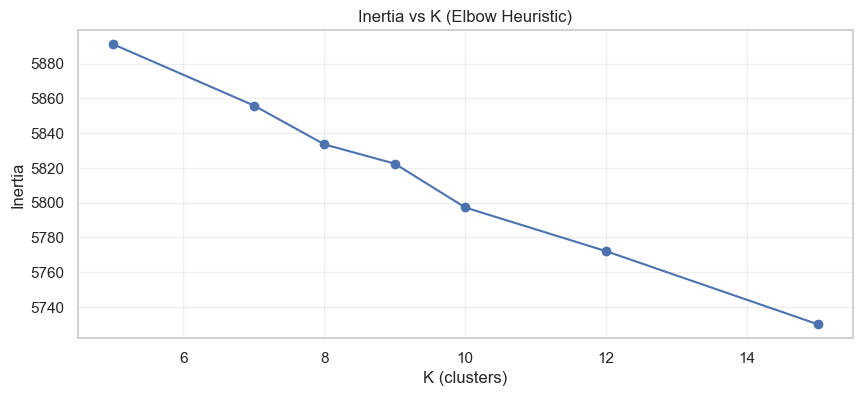

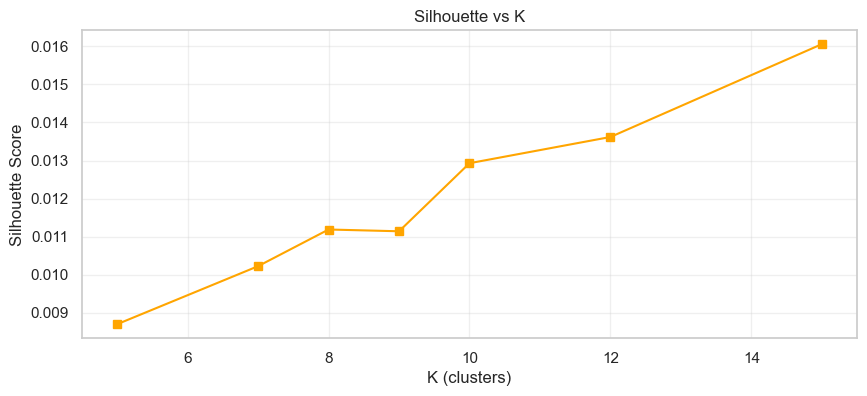

In [162]:
plt.figure(figsize=(10,4))
plt.plot(possible_k, inertias, marker='o')
plt.title('Inertia vs K (Elbow Heuristic)')
plt.xlabel('K (clusters)')
plt.ylabel('Inertia')
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(10,4))
plt.plot(possible_k, sil_scores, marker='s', color='orange')
plt.title('Silhouette vs K')
plt.xlabel('K (clusters)')
plt.ylabel('Silhouette Score')
plt.grid(alpha=0.3)
plt.show()


In [163]:
FINAL_K = 10   # <-- adjust after examining elbow & silhouette
kmeans = KMeans(n_clusters=FINAL_K, random_state=42, n_init=15)
kmeans.fit(tfidf_matrix)

df_cluster['cluster_k'] = kmeans.labels_
df_cluster[['comment_raw','cluster_k']].head()


,comment_raw,cluster_k
0,Om ded kaya seneng bangga bgttt lihat mereka b...,3
1,"Gila sabtu ini gue bahagia banget,sheila dtg k...",6
2,Salut sama keterbukaan dan kejujuran Vidi & Sh...,3
3,"Ya Allah, beri vidi kesehatan & panjang umur, ...",3
4,"Dari awal cuma mau nonton iseng, eh malah dape...",3


In [164]:
# Top Terms per Cluster (Term Signatures)

terms = np.array(vectorizer.get_feature_names_out())
order_centroids = kmeans.cluster_centers_.argsort(axis=1)[:, ::-1]

top_n = 15
cluster_top_terms = {}

for c in range(FINAL_K):
    top_idx = order_centroids[c][:top_n]
    top_terms = terms[top_idx]
    cluster_top_terms[c] = top_terms.tolist()
    print(f"\n=== Cluster {c} ===")
    print(", ".join(top_terms))



=== Cluster 0 ===
introvert, ngobrol, orang introvert, duo introvert, duo, orang, dua, introvert ngobrol, dua orang, obrolan, seru, ini, nyambung, bertemu, sheila

=== Cluster 1 ===
di, ini, bgt, sheila, yg, nya, ada, yang, ya, ga, sih, sama, the, aku, dan

=== Cluster 2 ===
film, no, pandji, partikelir, favorit, bang pandji, bang, nomor, film favorit, adalah, panji, pasti, film no, indonesia, film indonesia

=== Cluster 3 ===
vidi, sheila, om, ded, om ded, kak, banget, sama, ya, kak vidi, dan, ini, ka, sehat, ka vidi

=== Cluster 4 ===
bang, undang, dong, densu, bang densu, bang radit, radit, agam, om, rinjani, dan, nya, lu, ya, bisa

=== Cluster 5 ===
nonton, film, sore, ini, yang, di, dan, yg, nya, itu, film ini, ada, aku, tapi, dari

=== Cluster 6 ===
podhub, ke podhub, ke, di podhub, di, sheila, vidi, akhirnya, datang, ini, kak, datang ke, densu, om, vidi podhub

=== Cluster 7 ===
banget, sheila, bagus banget, cantik banget, lucu banget, bagus, seru banget, lucu, ini, seru, canti

In [165]:
# Inspect Top Terms per Cluster (Term Signatures) output first, then define labels here:
cluster_label_map = {
    0: 'Acting/Chemistry',     # example placeholder
    1: 'Plot/Ending',
    2: 'Access/WhereToWatch',
    3: 'Short Praise',
    4: 'Visual/Production',
    5: 'Sheila-Focused',
    6: 'Humor/Slang',
    7: 'Pace/Critique',
    8: 'Personality & Introvert Chemistry',
    9: 'Sheila & Vidi Duo / Greetings	'
}

df_cluster['cluster_label'] = df_cluster['cluster_k'].map(cluster_label_map)
df_cluster[['comment_raw','cluster_k','cluster_label']].head()


,comment_raw,cluster_k,cluster_label
0,Om ded kaya seneng bangga bgttt lihat mereka b...,3,Short Praise
1,"Gila sabtu ini gue bahagia banget,sheila dtg k...",6,Humor/Slang
2,Salut sama keterbukaan dan kejujuran Vidi & Sh...,3,Short Praise
3,"Ya Allah, beri vidi kesehatan & panjang umur, ...",3,Short Praise
4,"Dari awal cuma mau nonton iseng, eh malah dape...",3,Short Praise


In [166]:
# Cluster Size and Basi Stats

cluster_stats = (df_cluster
    .groupby('cluster_label')
    .agg(
        comments=('comment_raw','count'),
        sheila_share=('has_sheila','mean'),
        avg_tokens=('token_len','mean'),
        avg_emoji=('emoji_count','mean')
    )
    .sort_values('comments', ascending=False)
)

cluster_stats['sheila_share_pct'] = (cluster_stats['sheila_share']*100).round(2)
cluster_stats['avg_tokens'] = cluster_stats['avg_tokens'].round(2)
cluster_stats['avg_emoji'] = cluster_stats['avg_emoji'].round(3)
cluster_stats.drop(columns='sheila_share', inplace=True)

cluster_stats

,comments,avg_tokens,avg_emoji,sheila_share_pct
cluster_label,,,,
Plot/Ending,2928,9.94,0.028,9.36
Sheila-Focused,1141,37.68,0.047,9.20
Short Praise,432,14.44,0.019,38.43
Pace/Critique,364,10.98,0.033,19.78
Visual/Production,312,10.35,0.016,5.77
Sheila & Vidi Duo / Greetings\t,308,12.91,0.026,96.43
Humor/Slang,212,13.73,0.042,37.26
Personality & Introvert Chemistry,172,7.63,0.000,9.88
Access/WhereToWatch,161,8.06,0.000,0.00


In [167]:
# Sentiment distriibuion per Cluster (Using exsiting ruel labels)

sentiment_cluster = (df_cluster
    .pivot_table(index='cluster_label',
                 columns='sentiment_label',
                 values='comment_raw',
                 aggfunc='count',
                 fill_value=0)
)

sentiment_cluster_pct = (sentiment_cluster
                         .div(sentiment_cluster.sum(axis=1), axis=0)
                         .mul(100)
                         .round(2))

print("Counts:\n")
display(sentiment_cluster)
print("\nPercentages (%):\n")
display(sentiment_cluster_pct)


Counts:



sentiment_label,neg,neu,pos
cluster_label,,,
Access/WhereToWatch,2,143,16
Acting/Chemistry,3,101,8
Humor/Slang,10,167,35
Pace/Critique,11,201,152
Personality & Introvert Chemistry,1,157,14
Plot/Ending,81,2381,466
Sheila & Vidi Duo / Greetings\t,5,219,84
Sheila-Focused,96,752,293
Short Praise,23,271,138



Percentages (%):



sentiment_label,neg,neu,pos
cluster_label,,,
Access/WhereToWatch,1.24,88.82,9.94
Acting/Chemistry,2.68,90.18,7.14
Humor/Slang,4.72,78.77,16.51
Pace/Critique,3.02,55.22,41.76
Personality & Introvert Chemistry,0.58,91.28,8.14
Plot/Ending,2.77,81.32,15.92
Sheila & Vidi Duo / Greetings\t,1.62,71.10,27.27
Sheila-Focused,8.41,65.91,25.68
Short Praise,5.32,62.73,31.94


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24488\3781540095.py:32: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
c:\Users\Lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


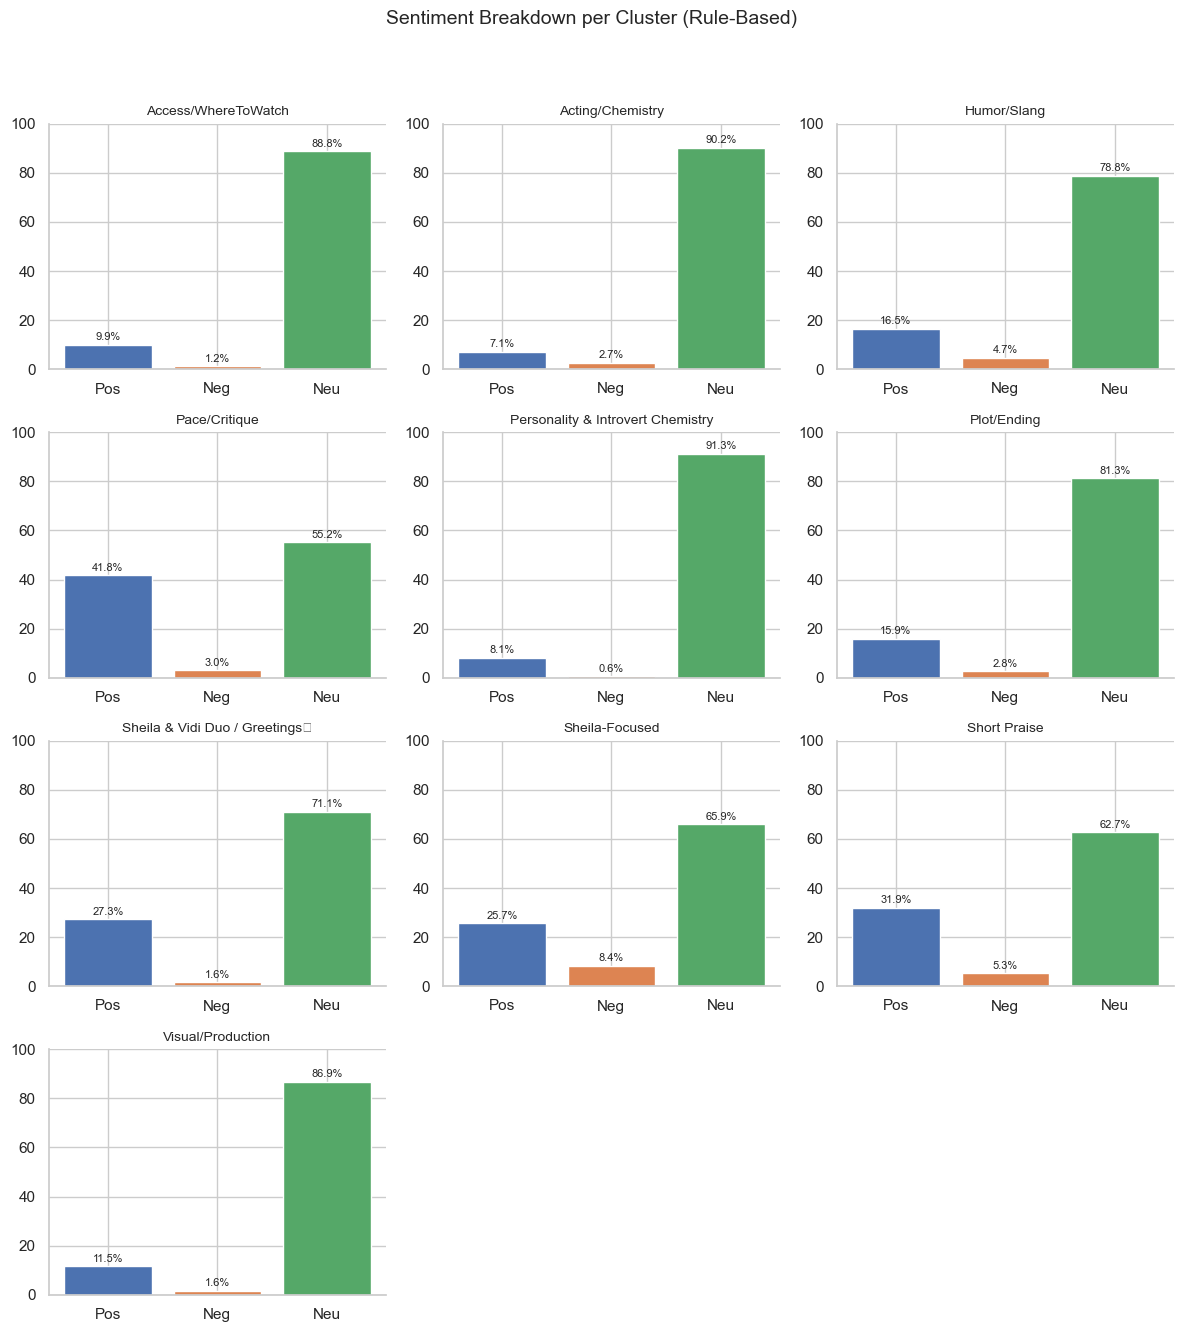

In [168]:
# Ensure sentiment_cluster_pct has columns ['pos','neg','neu'] or adjust order
sent_perc = sentiment_cluster_pct.copy()
sent_perc = sent_perc[['pos','neg','neu']]  # re‑order for consistency

clusters = sent_perc.index.tolist()
num_clusters = len(clusters)

# determine grid size (3 plots per row)
cols = 3
rows = math.ceil(num_clusters / cols)

plt.figure(figsize=(cols*4, rows*3.5))

for i, cl in enumerate(clusters):
    ax = plt.subplot(rows, cols, i+1)
    # bar positions
    x = [0, 1, 2]
    heights = sent_perc.loc[cl]
    colors = ['#4C72B0', '#DD8452', '#55A868']  # blue, orange, green
    ax.bar(x, heights, color=colors)
    ax.set_xticks(x)
    ax.set_xticklabels(['Pos', 'Neg', 'Neu'])
    ax.set_ylim(0, 100)
    ax.set_title(cl, fontsize=10)
    # add value labels on top of bars
    for xi, h in zip(x, heights):
        ax.text(xi, h + 1, f"{h:.1f}%", ha='center', va='bottom', fontsize=8)
    # remove spines for cleaner look
    sns.despine(ax=ax)

plt.suptitle('Sentiment Breakdown per Cluster (Rule-Based)', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24488\325831649.py:8: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
c:\Users\Lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


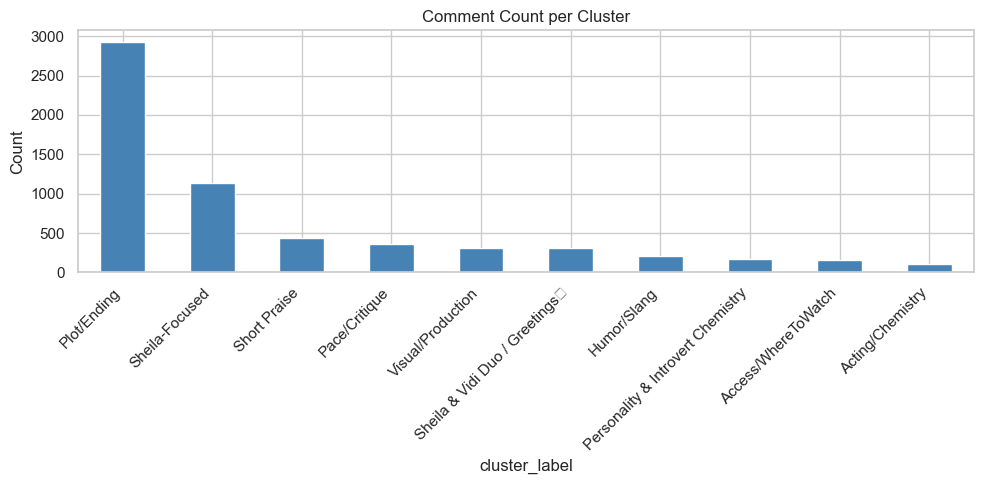

In [169]:
cluster_counts = df_cluster['cluster_label'].value_counts()

plt.figure(figsize=(10,5))
cluster_counts.plot(kind='bar', color='steelblue')
plt.title('Comment Count per Cluster')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


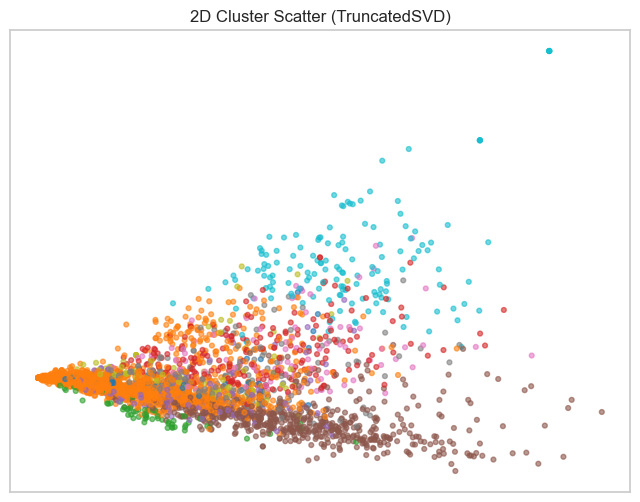

In [170]:
# SVD for dimensionality reduction (similar to LSA)
svd = TruncatedSVD(n_components=2, random_state=42)
coords2d = svd.fit_transform(tfidf_matrix)

df_cluster['x2d'] = coords2d[:,0]
df_cluster['y2d'] = coords2d[:,1]

# Sample for clarity (avoid overplot)
sample_vis = df_cluster.sample(min(3000, len(df_cluster)), random_state=42)

plt.figure(figsize=(8,6))
plt.scatter(sample_vis['x2d'], sample_vis['y2d'],
            c=sample_vis['cluster_k'], cmap='tab10', alpha=0.6, s=12)
plt.title('2D Cluster Scatter (TruncatedSVD)')
plt.xticks([])
plt.yticks([])
plt.show()


cluster_label
Sheila & Vidi Duo / Greetings\t      96.43
Short Praise                         38.43
Humor/Slang                          37.26
Pace/Critique                        19.78
Acting/Chemistry                     13.39
Personality & Introvert Chemistry     9.88
Plot/Ending                           9.36
Sheila-Focused                        9.20
Visual/Production                     5.77
Access/WhereToWatch                   0.00
Name: has_sheila, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24488\40052353.py:15: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
c:\Users\Lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


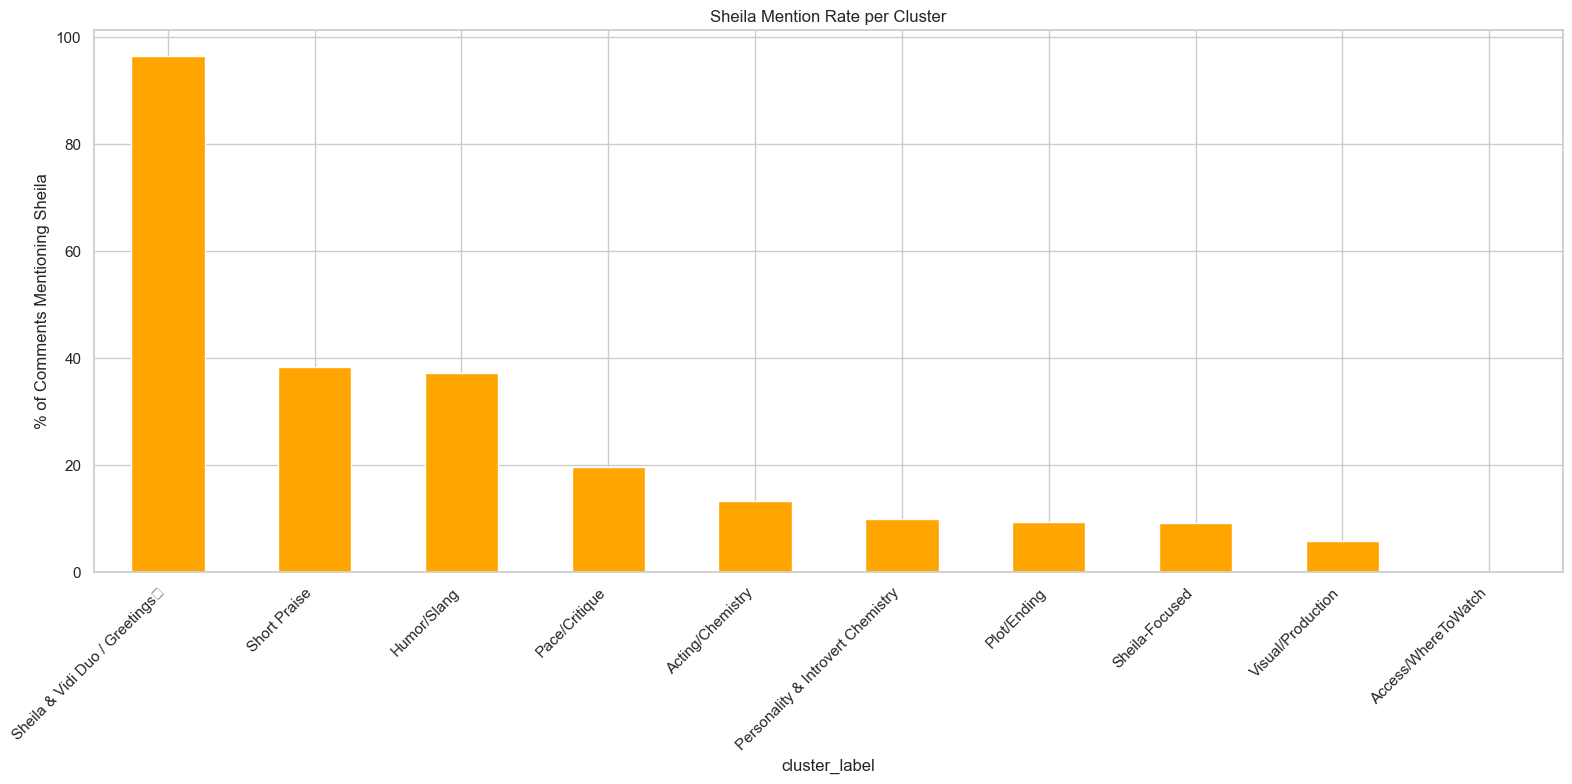

In [171]:
sheila_cluster = (df_cluster
                  .groupby('cluster_label')['has_sheila']
                  .mean()
                  .sort_values(ascending=False)
                  .mul(100)
                  .round(2))

print(sheila_cluster)

plt.figure(figsize=(16,8))
sheila_cluster.plot(kind='bar', color='orange')
plt.ylabel('% of Comments Mentioning Sheila')
plt.title('Sheila Mention Rate per Cluster')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [172]:
cluster_stats = (
    df_cluster
      .groupby('cluster_label')
      .agg(
          comments=('comment_raw', 'count'),
          sheila_share=('has_sheila', 'mean')
      )
      .sort_values('comments', ascending=False)
)

cluster_stats['pct_all'] = (
    cluster_stats['comments'] /
    cluster_stats['comments'].sum() * 100
).round(1)

cluster_stats['sheila_share_pct'] = (
    cluster_stats['sheila_share'] * 100
).round(2)

cluster_stats_trim = cluster_stats[['comments', 'pct_all', 'sheila_share_pct']]
cluster_stats_trim


,comments,pct_all,sheila_share_pct
cluster_label,,,
Plot/Ending,2928,47.7,9.36
Sheila-Focused,1141,18.6,9.20
Short Praise,432,7.0,38.43
Pace/Critique,364,5.9,19.78
Visual/Production,312,5.1,5.77
Sheila & Vidi Duo / Greetings\t,308,5.0,96.43
Humor/Slang,212,3.5,37.26
Personality & Introvert Chemistry,172,2.8,9.88
Access/WhereToWatch,161,2.6,0.00


In [173]:
# Grab a few sample comments from each cluster to validate labeling quality
samples_per_cluster = 5
for cl in sorted(df_cluster['cluster_label'].dropna().unique()):
    print(f"\n=== {cl} ===")
    subset = df_cluster[df_cluster['cluster_label']==cl].head(samples_per_cluster)
    for txt in subset['comment_raw']:
        print("-", txt[:140].replace('\n',' '))



=== Access/WhereToWatch ===
- episode favorit
- No 8
- Trending no 1
- 4:59 Gua tebak film nomor 1 Bang Pandji adalah Jokowi adalah Kita (2014)
- 4:59 Film Indonesia terbaik sepanjang masa menurut Panji :  Arisan

=== Acting/Chemistry ===
- Guys,sheila itu introvert bukan ansos. Introvert itu kalo sm orang yg udh kenal dan akrab dia bakal seru juga. Beda kalo ansos yg emg bner2 
- orang introvert klo masuk podhub jdi awkward gak sih  aneh tapi lucu
- Extrovert fix ingetnya general introvert ingetnya emang yang detail
- introvert seasik ini woyyyy
- Mana ada orang introvert begitu, bang vidi boong banget

=== Humor/Slang ===
- Gila sabtu ini gue bahagia banget,sheila dtg ke podhub,dan selucu itu dia.....bahagia bgt pasti kak vidi
- sesuai ekspektasi banget, liat sheila berkeliaran di podcast pasti ada di podhub dan ya finally worth to wait! seruuuu!!
- Parah wehh abis nonton ini gue bahagia banget,sheila dtg ke podhub,dan selucu itu dia.....bahagia bgt pasti kak vidi
- Yeahhhh.....   A

In [174]:
# --- METRIC CALCULATOR for README v0 ---------------------------------
import pandas as pd
import numpy as np

### 1. Average tokens & emoji (Sheila vs Non)
avg_token_sheila = round(df[df['has_sheila']]['token_len'].mean(), 2)
avg_token_non    = round(df[~df['has_sheila']]['token_len'].mean(), 2)

avg_emoji_sheila = round(df[df['has_sheila']]['emoji_count'].mean(), 3)
avg_emoji_non    = round(df[~df['has_sheila']]['emoji_count'].mean(), 3)
emoji_lift       = round(avg_emoji_sheila - avg_emoji_non, 3)

### 2. Sentiment slice Sheila
sent_sheila = df[df['has_sheila']]['sentiment_label'].value_counts(normalize=True).reindex(['pos','neg','neu']).fillna(0).mul(100).round(2)
POS_SHE, NEG_SHE, NEU_SHE = sent_sheila.get('pos',0), sent_sheila.get('neg',0), sent_sheila.get('neu',0)

### 3. Positive lift & Impact v0
POS_GLOB = 20.22   # <-- sesuaikan jika angka global berubah
positive_lift = round(POS_SHE - POS_GLOB, 2)

sheila_share_pct = 16.33      # sudah diketahui
impact_v0 = round(
    0.4 * sheila_share_pct +
    0.4 * max(0, positive_lift) +
    0.2 * max(0, emoji_lift * 10), 2
)

### 4. Suspect user %
suspect_pct = round(df['suspect_user'].mean() * 100, 2)

### 5. Top 3 emoji (by freq)
emoji_series = df['comment_raw'].str.findall(
    r'['
    r'\U0001F300-\U0001F6FF'
    r'\U0001F900-\U0001F9FF'
    r'\U0001F1E0-\U0001F1FF'
    r'\U00002700-\U000027BF'
    r'\U00002600-\U000026FF'
    r'\U0001FA70-\U0001FAFF'
    r']'
).explode().value_counts()

top_emoji = emoji_series.head(3).index.tolist()
top_emoji_str = ', '.join(top_emoji) if top_emoji else '–'

### 6. Print summary + markdown
metrics = {
    'AVG_TOKEN_SHEILA' : avg_token_sheila,
    'AVG_TOKEN_NON'    : avg_token_non,
    'EMOJI_SHEILA'     : avg_emoji_sheila,
    'EMOJI_NON'        : avg_emoji_non,
    'EMOJI_LIFT'       : emoji_lift,
    'POS_SHE'          : POS_SHE,
    'NEG_SHE'          : NEG_SHE,
    'NEU_SHE'          : NEU_SHE,
    'POS_LIFT'         : positive_lift,
    'IMPACT_V0'        : impact_v0,
    'SUSPECT_PCT'      : suspect_pct,
    'TOP_EMOJI'        : top_emoji_str
}

print("=== METRICS READY ===")
for k,v in metrics.items():
    print(f"{k:15} -> {v}")

print("\n=== MARKDOWN SNIPPET ===")
print(f"- Rata‑rata token (Sheila / Non) : **{avg_token_sheila} / {avg_token_non}**")
print(f"- Rata‑rata emoji (Sheila / Non) : **{avg_emoji_sheila} / {avg_emoji_non}**  (lift {emoji_lift:+})")
print(f"- Sentimen Sheila                : **{POS_SHE}% pos / {NEG_SHE}% neg / {NEU_SHE}% neu**  (positive lift {positive_lift:+} pp)")
print(f"- Suspect user                   : **{suspect_pct}%**")
print(f"- Top emoji                      : {top_emoji_str}")
print(f"- 🚀 Sheila Impact v0             : **{impact_v0}** (skala internal)")

# ----------------------------------------------------------------------


=== METRICS READY ===
AVG_TOKEN_SHEILA -> 20.94
AVG_TOKEN_NON   -> 13.93
EMOJI_SHEILA    -> 0.042
EMOJI_NON       -> 0.027
EMOJI_LIFT      -> 0.015
POS_SHE         -> 30.46
NEG_SHE         -> 4.31
NEU_SHE         -> 65.23
POS_LIFT        -> 10.24
IMPACT_V0       -> 10.66
SUSPECT_PCT     -> 0.08
TOP_EMOJI       -> 🥹, 🫶, 🫵

=== MARKDOWN SNIPPET ===
- Rata‑rata token (Sheila / Non) : **20.94 / 13.93**
- Rata‑rata emoji (Sheila / Non) : **0.042 / 0.027**  (lift +0.015)
- Sentimen Sheila                : **30.46% pos / 4.31% neg / 65.23% neu**  (positive lift +10.24 pp)
- Suspect user                   : **0.08%**
- Top emoji                      : 🥹, 🫶, 🫵
- 🚀 Sheila Impact v0             : **10.66** (skala internal)
